# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Fiyanda Ma'muri
- **Email:** fiyandamamuri@gmail.com
- **ID Dicoding:** fiyandamamuri

## Menentukan Pertanyaan Bisnis
- Pertanyaan 1 : Bagaimana distribusi pelanggan per kota selama periode data yang tersedia (2016-2018), dan apakah terjadi perubahan signifikan di 5 kota teratas dibandingkan dengan kota lainnya?

- Pertanyaan 2 : Bagaimana tren penggunaan metode pembayaran pelanggan dari tahun 2016-2018, dan metode mana yang memberikan kontribusi terbesar terhadap total transaksi?

- Pertanyaan 3 : Bagaimana tren jumlah pesanan per bulan selama periode 2016–2018, dan apakah terdapat pola musiman atau perubahan signifikan yang dapat menjadi dasar strategi promosi dan pengelolaan inventaris?

- Pertanyaan 4 : Kategori produk apa yang paling populer selama tahun 2016-2028?

- Pertanyaan 5 : Berapa rata-rata waktu pengiriman (dari pembelian hingga diterima pelanggan) selama periode 2016–2018, dan apakah terdapat perbedaan signifikan antar kota atau wilayah?

- Pertanyaan 6 : Bagaimana distribusi skor ulasan pelanggan, dan apakah terdapat hubungan antara review_score dengan waktu pengiriman atau nilai transaksi?

- Pertanyaan 7 : Siapa saja penjual dengan total penjualan tertinggi, dan bagaimana rata-rata waktu pengiriman mereka dibandingkan dengan penjual lain?

- Pertanyaan 8 : Berapa proporsi pelanggan baru vs pelanggan yang melakukan pembelian ulang selama periode 2016–2018?

- Pertanyaan 9 : Bagaimana performa penjualan dan rata-rata nilai transaksi per negara bagian (state), dan area mana yang paling berkontribusi terhadap total revenue?

- Pertanyaan 10 : Bagaimana segmentasi pelanggan berdasarkan nilai Recency, Frequency, dan Monetary selama periode 2016–2018, dan segmen pelanggan mana yang paling berpotensi untuk program retensi atau promosi loyalitas?

## Import Packages/Library

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
order_items = pd.read_csv('datasets/order_items_dataset.csv')
order_items.info()
order_items.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**order_items_dataset**

| Kolom                 | Deskripsi                                    |
| --------------------- | -------------------------------------------- |
| `order_id`            | ID pesanan (menghubungkan ke tabel `orders`) |
| `order_item_id`       | Urutan item dalam satu pesanan (1, 2, dst.)  |
| `product_id`          | ID produk yang dibeli                        |
| `seller_id`           | ID penjual yang menjual produk tersebut      |
| `shipping_limit_date` | Batas waktu penjual untuk mengirim produk    |
| `price`               | Harga produk (tanpa ongkir)                  |
| `freight_value`       | Biaya pengiriman untuk item tersebut         |



In [3]:
order_reviews = pd.read_csv("datasets/order_reviews_dataset.csv")
order_reviews.info()
order_reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**order_reviews_datasets**

| Kolom                     | Deskripsi                                     |
| ------------------------- | --------------------------------------------- |
| `review_id`               | ID unik untuk setiap ulasan pelanggan         |
| `order_id`                | ID pesanan yang diulas                        |
| `review_score`            | Skor ulasan (1–5)                             |
| `review_comment_title`    | Judul singkat ulasan pelanggan                |
| `review_comment_message`  | Isi komentar atau ulasan pelanggan            |
| `review_creation_date`    | Tanggal ulasan dibuat                         |
| `review_answer_timestamp` | Tanggal sistem merespons atau mencatat ulasan |


In [4]:
orders = pd.read_csv("datasets/orders_dataset.csv")
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**orders_dataset**

| Kolom                           | Deskripsi                                           |
| ------------------------------- | --------------------------------------------------- |
| `order_id`                      | ID unik untuk setiap pesanan pelanggan              |
| `customer_id`                   | ID unik untuk pelanggan yang melakukan pesanan      |
| `order_status`                  | Status pesanan (delivered, shipped, canceled, dll.) |
| `order_purchase_timestamp`      | Tanggal & waktu pesanan dibuat oleh pelanggan       |
| `order_approved_at`             | Tanggal & waktu pesanan disetujui oleh sistem       |
| `order_delivered_carrier_date`  | Tanggal pesanan dikirim ke ekspedisi                |
| `order_delivered_customer_date` | Tanggal pesanan diterima oleh pelanggan             |
| `order_estimated_delivery_date` | Estimasi tanggal pesanan akan diterima pelanggan    |


In [5]:
products = pd.read_csv("datasets/products_dataset.csv")
products.info()
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**products_dataset**

| Kolom                        | Deskripsi                                    |
| ---------------------------- | -------------------------------------------- |
| `product_id`                 | ID produk                                    |
| `product_category_name`      | Nama kategori produk (dalam bahasa Portugis) |
| `product_name_lenght`        | Panjang nama produk (jumlah karakter)        |
| `product_description_lenght` | Panjang deskripsi produk                     |
| `product_photos_qty`         | Jumlah foto produk                           |
| `product_weight_g`           | Berat produk (gram)                          |
| `product_length_cm`          | Panjang produk (cm)                          |
| `product_height_cm`          | Tinggi produk (cm)                           |
| `product_width_cm`           | Lebar produk (cm)                            |


In [6]:
geolocation = pd.read_csv("datasets/geolocation_dataset.csv")
geolocation.info()
geolocation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**geolocation_dataset**

| Kolom                         | Deskripsi                     |
| ----------------------------- | ----------------------------- |
| `geolocation_zip_code_prefix` | Kode pos wilayah              |
| `geolocation_lat`             | Koordinat lintang (latitude)  |
| `geolocation_lng`             | Koordinat bujur (longitude)   |
| `geolocation_city`            | Nama kota                     |
| `geolocation_state`           | Kode negara bagian (provinsi) |


In [7]:
sellers = pd.read_csv("datasets/sellers_dataset.csv")
sellers.info()
sellers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**sellers_dataset**

| Kolom                    | Deskripsi                        |
| ------------------------ | -------------------------------- |
| `seller_id`              | ID unik untuk setiap penjual     |
| `seller_zip_code_prefix` | Kode pos penjual                 |
| `seller_city`            | Kota tempat penjual berada       |
| `seller_state`           | Negara bagian (provinsi) penjual |


In [8]:
order_payments = pd.read_csv("datasets/order_payments_dataset.csv")
order_payments.info()
order_payments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**order_payments**

| Kolom                  | Deskripsi                                             |
| ---------------------- | ----------------------------------------------------- |
| `order_id`             | ID pesanan (relasi ke `orders`)                       |
| `payment_sequential`   | Urutan pembayaran untuk satu pesanan                  |
| `payment_type`         | Jenis pembayaran (credit_card, boleto, voucher, dll.) |
| `payment_installments` | Jumlah cicilan pembayaran                             |
| `payment_value`        | Total nilai pembayaran (termasuk biaya tambahan)      |


In [9]:
customers = pd.read_csv("datasets/customers_dataset.csv")
customers.info()
customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**customers_dataset**

| Kolom                      | Deskripsi                                                                              |
| -------------------------- | -------------------------------------------------------------------------------------- |
| `customer_id`              | ID pelanggan (relasi ke tabel `orders`)                                                |
| `customer_unique_id`       | ID unik untuk pelanggan di seluruh pesanan (pelanggan bisa punya banyak `customer_id`) |
| `customer_zip_code_prefix` | Kode pos pelanggan                                                                     |
| `customer_city`            | Kota tempat pelanggan tinggal                                                          |
| `customer_state`           | Negara bagian (provinsi) pelanggan                                                     |


In [10]:
product_category_name_translation = pd.read_csv("datasets/product_category_name_translation.csv")
product_category_name_translation.info()
product_category_name_translation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**product_category_name_translation**

| Kolom                           | Deskripsi                              |
| ------------------------------- | -------------------------------------- |
| `product_category_name`         | Nama kategori produk (bahasa Portugis) |
| `product_category_name_english` | Nama kategori produk (bahasa Inggris)  |


In [11]:
# Menggabungkan data dari beberapa tabel
merged_data = order_items.merge(orders, on='order_id', how='left') \
    .merge(order_reviews, on='order_id', how='left') \
    .merge(products, on='product_id', how='left') \
    .merge(customers, on='customer_id', how='left') \
    .merge(order_payments, on='order_id', how='left') \
    .merge(sellers, on='seller_id', how='left') \
    .merge(product_category_name_translation, left_on='product_category_name', right_on='product_category_name', how='left')

In [12]:
merged_data.info()
merged_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118310 entries, 0 to 118309
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118310 non-null  object 
 1   order_item_id                  118310 non-null  int64  
 2   product_id                     118310 non-null  object 
 3   seller_id                      118310 non-null  object 
 4   shipping_limit_date            118310 non-null  object 
 5   price                          118310 non-null  float64
 6   freight_value                  118310 non-null  float64
 7   customer_id                    118310 non-null  object 
 8   order_status                   118310 non-null  object 
 9   order_purchase_timestamp       118310 non-null  object 
 10  order_approved_at              118295 non-null  object 
 11  order_delivered_carrier_date   117056 non-null  object 
 12  order_delivered_customer_date 

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,1.0,credit_card,2.0,72.19,27277,volta redonda,SP,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1.0,credit_card,3.0,259.83,3471,sao paulo,SP,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1.0,credit_card,5.0,216.87,37564,borda da mata,MG,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1.0,credit_card,2.0,25.78,14403,franca,SP,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1.0,credit_card,3.0,218.04,87900,loanda,PR,garden_tools


### Assessing Data

In [13]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118310 entries, 0 to 118309
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118310 non-null  object 
 1   order_item_id                  118310 non-null  int64  
 2   product_id                     118310 non-null  object 
 3   seller_id                      118310 non-null  object 
 4   shipping_limit_date            118310 non-null  object 
 5   price                          118310 non-null  float64
 6   freight_value                  118310 non-null  float64
 7   customer_id                    118310 non-null  object 
 8   order_status                   118310 non-null  object 
 9   order_purchase_timestamp       118310 non-null  object 
 10  order_approved_at              118295 non-null  object 
 11  order_delivered_carrier_date   117056 non-null  object 
 12  order_delivered_customer_date 

In [14]:
# Mengecek missing values
missing_values = merged_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 order_id                              0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1254
order_delivered_customer_date      2588
order_estimated_delivery_date         0
review_id                           978
review_score                        978
review_comment_title             104418
review_comment_message            68628
review_creation_date                978
review_answer_timestamp             978
product_category_name              1709
product_name_lenght                1709
product_description_lenght         1709
product_photos_qty                 1709
product_

In [15]:
# mengecek kolom unik order_status
unique_order_status = merged_data['order_status'].unique()
print("Unique values in 'order_status':", unique_order_status)

Unique values in 'order_status': ['delivered' 'shipped' 'canceled' 'invoiced' 'processing' 'approved'
 'unavailable']


In [16]:
# mengecek jumlah data unavailable order_status
unavailable_order_status_count = merged_data[merged_data['order_status'] == 'unavailable'].shape[0]
print("Number of 'unavailable' order_status:", unavailable_order_status_count)

Number of 'unavailable' order_status: 7


In [17]:
# mengecek 5 data dari seluruh kolom yang product_category_name adalah NaN
missing_category_data = merged_data[merged_data['product_category_name'].isnull()].head()
missing_category_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
126,0046e1d57f4c07c8c92ab26be8c3dfc0,1,ff6caf9340512b8bf6d2a2a6df032cfa,38e6dada03429a47197d5d584d793b41,2017-10-02 15:49:17,7.79,7.78,ae55e228ded796581eccc67045516023,delivered,2017-09-26 15:24:03,2017-09-26 15:49:17,2017-09-28 18:42:42,2017-09-29 18:29:50,2017-10-11 00:00:00,219cb56781473bd4ee7023459372d25c,5.0,NaN,NaN,2017-09-30 00:00:00,2017-10-02 00:13:27,NaN,NaN,NaN,NaN,200.0,16.0,5.0,12.0,b0efd7adeb04d15b16edaedd11215d40,2712,sao paulo,SP,1.0,credit_card,1.0,15.57,4763,sao paulo,SP,NaN
128,00482f2670787292280e0a8153d82467,1,a9c404971d1a5b1cbc2e4070e02731fd,702835e4b785b67a084280efca355756,2017-02-17 16:18:07,7.60,10.96,baa4ed05f22ffb6c4a41b71b699a492c,delivered,2017-02-13 16:18:07,2017-02-14 03:42:56,2017-02-14 08:32:53,2017-02-15 11:35:56,2017-03-10 00:00:00,c13699f8e389acea5f406e527f0edfb3,5.0,NaN,NaN,2017-02-16 00:00:00,2017-02-17 10:32:17,NaN,NaN,NaN,NaN,700.0,35.0,14.0,11.0,d4c784ecad19dfe09e63ffaf9ada82a3,36050,juiz de fora,MG,1.0,boleto,1.0,18.56,36046,juiz de fora,MG,NaN
135,004f5d8f238e8908e6864b874eda3391,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-03-06 09:29:25,122.99,15.61,a69c820c317aa348d781a9d6732afc23,delivered,2018-02-27 12:16:30,2018-02-28 09:29:25,2018-02-28 20:48:42,2018-03-23 00:52:43,2018-03-21 00:00:00,23e790c68acbe511dd7b94c6707f2e41,3.0,NaN,NaN,2018-03-23 00:00:00,2018-03-23 10:19:03,NaN,NaN,NaN,NaN,400.0,20.0,12.0,15.0,17726716a98c98a7806b43a789820245,79304,corumba,MS,1.0,boleto,1.0,138.60,7133,guarulhos,SP,NaN
145,0057199db02d1a5ef41bacbf41f8f63b,1,41eee23c25f7a574dfaf8d5c151dbb12,e5a3438891c0bfdb9394643f95273d8e,2018-01-25 09:07:51,20.30,16.79,c664dc5de5b5f4184bc4ca0285b9f8fe,delivered,2018-01-18 17:05:30,2018-01-20 09:07:51,2018-01-23 14:33:54,2018-02-06 20:07:20,2018-02-20 00:00:00,a96a757f169ded9f72fc4f3c03750d60,4.0,NaN,NaN,2018-02-07 00:00:00,2018-02-08 11:17:47,NaN,NaN,NaN,NaN,200.0,16.0,2.0,11.0,9a5b186787a143669398bd8083720c21,78550,sinop,MT,1.0,boleto,1.0,37.09,13483,limeira,SP,NaN
174,006cb7cafc99b29548d4f412c7f9f493,1,e10758160da97891c2fdcbc35f0f031d,323ce52b5b81df2cd804b017b7f09aa7,2018-02-22 13:35:28,56.00,14.14,97dc92f1aae3a7db8b252d1b8466910e,delivered,2018-02-17 14:22:34,2018-02-17 14:35:28,2018-02-20 19:08:00,2018-02-25 13:46:52,2018-03-13 00:00:00,304aaea0a61ca9e8c661cc7a403be82f,5.0,NaN,NaN,2018-02-26 00:00:00,2018-02-26 17:00:30,NaN,NaN,NaN,NaN,2200.0,16.0,2.0,11.0,d5faae3f913e775994e53068992969b5,70670,brasilia,DF,1.0,credit_card,3.0,70.14,3306,sao paulo,SP,NaN


In [18]:
# Cek proporsi missing values pada kolom product_category_name
merged_data['product_category_name'].isna().mean() * 100

np.float64(1.4445101851069226)

In [19]:
# Mengecek jumlah duplikat
duplicate_count = merged_data.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


In [20]:
# Mengecek inconsistencies atau format tidak standar
inconsistent_formats = merged_data.select_dtypes(include=['object']).apply(lambda x: x.str.contains(r'[^a-zA-Z0-9\s]', na=False))
inconsistent_formats.sum()

order_id                              0
product_id                            0
seller_id                             0
shipping_limit_date              118310
customer_id                           0
order_status                          0
order_purchase_timestamp         118310
order_approved_at                118295
order_delivered_carrier_date     117056
order_delivered_customer_date    115722
order_estimated_delivery_date    118310
review_id                             0
review_comment_title               4428
review_comment_message            40133
review_creation_date             117332
review_answer_timestamp          117332
product_category_name             87288
customer_unique_id                    0
customer_city                       538
customer_state                        0
payment_type                      88957
seller_city                        1070
seller_state                          0
product_category_name_english     81716
dtype: int64

In [21]:
# Statistik deskriptif untuk kolom numerik  
numeric_descriptive_stats = merged_data.describe()
numeric_descriptive_stats

,order_item_id,price,freight_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix
count,118310.000000,118310.000000,118310.000000,117332.000000,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,118310.000000,118307.000000,118307.000000,118307.000000,118310.000000
mean,1.196543,120.646603,20.032387,4.031390,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,35050.658693,1.094069,2.943317,172.575102,24442.410413
std,0.699489,184.109691,15.836850,1.387994,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,29824.585904,0.728579,2.777877,267.110727,27573.004511
min,1.000000,0.850000,0.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1.000000,0.000000,0.000000,1001.000000
25%,1.000000,39.900000,13.080000,4.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11310.000000,1.000000,1.000000,60.850000,6429.000000
50%,1.000000,74.900000,16.280000,5.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24275.500000,1.000000,2.000000,108.200000,13660.000000
75%,1.000000,134.900000,21.180000,5.000000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,58636.250000,1.000000,4.000000,189.260000,27972.000000
max,21.000000,6735.000000,409.680000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99990.000000,29.000000,24.000000,13664.080000,99730.000000


In [22]:
# Statistik deskriptif untuk kolom kategorikal
categorical_descriptive_stats = merged_data.describe(include=['object'])
categorical_descriptive_stats

,order_id,product_id,seller_id,shipping_limit_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,customer_unique_id,customer_city,customer_state,payment_type,seller_city,seller_state,product_category_name_english
count,118310,118310,118310,118310,118310,118310,118310,118295,117056,115722,118310,117332,13892,49682,117332,117332,116601,118310,118310,118310,118307,118310,118310,116576
unique,98666,32951,3095,93318,98666,7,98112,90174,81017,95664,450,97709,4497,35692,633,97547,73,95420,4110,27,4,611,23,71
top,895ab968e7bb0d5659d16cd74cd1650c,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00,eef5dbca8d37dfce6db7d7b16dd0525e,Recomendo,Muito bom,2017-12-19 00:00:00,2017-08-17 22:17:55,cama_mesa_banho,9a736b248f67d166d2fbb006bcb877c3,sao paulo,SP,credit_card,sao paulo,SP,bed_bath_table
freq,63,536,2155,63,63,115723,63,63,63,63,656,63,494,259,542,63,11988,75,18727,49865,87258,29293,84377,11988


**Insight:**

**1. Struktur dan Ukuran Data**
- Dataset gabungan berisi 118.310 baris dan 40 kolom.
- Tipe data terdiri dari 13 kolom numerik dan 24 kolom kategorikal.
- Tidak ditemukan baris duplikat (duplicate rows = 0) → data unik per transaksi.

**2. Missing Values (Data Hilang)**
- Beberapa kolom memiliki missing values cukup signifikan, terutama:
    - review_comment_title (88%) dan review_comment_message (58%) — banyak pelanggan tidak menulis ulasan teks.
    - review_score, review_creation_date, review_answer_timestamp (±1%) — sebagian pesanan tidak memiliki review.
    - product_category_name dan product_category_name_english (~1,5%) — ada produk tanpa kategori.
    - Kolom tanggal pengiriman (order_delivered_customer_date, order_delivered_carrier_date) juga ada data kosong → kemungkinan pesanan dibatalkan atau belum terkirim.

**3. Inconsistent Format**
- Beberapa kolom tanggal (shipping_limit_date, order_purchase_timestamp, dll.) terdeteksi sebagai format tidak standar (object) dan perlu dikonversi ke tipe datetime.
- Kolom teks seperti product_category_name_english, seller_city, dan payment_type menunjukkan banyak format tidak konsisten (mungkin huruf besar-kecil, spasi, atau karakter khusus).

**4. Statistik Deskriptif — Kolom Numerik**
- Harga produk (price)
    - Rata-rata: ~120 BRL
    - Sebaran sangat lebar (max 6.735 BRL → outlier mungkin ada produk mahal).
- Freight value (biaya kirim) rata-rata 20 BRL, maksimum 409 BRL.
- Review score rata-rata 4.03 → pelanggan umumnya puas.
- Product weight_g bervariasi besar (0–40.425 gram) → ada kemungkinan data aneh (produk 0 gram).
- Payment installments (angsuran) rata-rata 3 kali → mayoritas pembeli menggunakan cicilan ringan.

**5. Statistik Deskriptif — Kolom Kategorikal**
- Order status: mayoritas “delivered” → sistem pengiriman relatif sukses.
- Payment type: didominasi credit_card (±87%), metode lain lebih sedikit.
- Customer city: lebih dari 4.000 kota, dengan Sao Paulo paling banyak transaksi (~18.000 pelanggan).
- Product category terbanyak: cama_mesa_banho (bed_bath_table).

### Cleaning Data

In [23]:
# Konversi kolom bertipe waktu ke datetime
date_columns = [
    'order_purchase_timestamp', 'order_approved_at', 
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'order_estimated_delivery_date', 'shipping_limit_date',
    'review_creation_date', 'review_answer_timestamp'
]
for col in date_columns:
    merged_data[col] = pd.to_datetime(merged_data[col], errors='coerce')

In [24]:
# Konversi kolom kategorikal ke category
cat_cols = [
    'order_status', 'payment_type', 'product_category_name_english',
    'customer_state', 'seller_state', 'customer_city', 'seller_city'
]
for col in cat_cols:
    merged_data[col] = merged_data[col].astype('category')

In [25]:
# Konversi kolom numerik ke float atau int
int_cols = ['order_item_id', 'customer_zip_code_prefix', 'seller_zip_code_prefix']
merged_data[int_cols] = merged_data[int_cols].astype('int64')

float_cols = ['price', 'freight_value', 'payment_value', 'payment_installments']
merged_data[float_cols] = merged_data[float_cols].astype('float64')

In [26]:
# Memastikan id bertipe string (object)
id_cols = ['order_id', 'customer_id', 'customer_unique_id',
           'product_id', 'seller_id', 'review_id']
merged_data[id_cols] = merged_data[id_cols].astype('string')

In [27]:
# Menghapus baris yang memiliki nilai null di kolom produk tertentu
merged_data = merged_data.dropna(
    subset=[
        'product_category_name',
        'product_name_lenght',
        'product_description_lenght',
        'product_photos_qty'
    ]
)

In [28]:
# menghapus baris yang memiliki nilai null di kolom review_score
merged_data = merged_data.dropna(subset=['review_score'])

In [29]:
# menghapus baris yang memiliki nilai null di kolom dimensi produk
merged_data = merged_data.dropna(subset=['product_weight_g', 'product_length_cm', 
                                         'product_height_cm', 'product_width_cm'])

In [30]:
# menghapus baris yang memiliki nilai null di kolom pembayaran
merged_data = merged_data.dropna(subset=['payment_sequential', 'payment_type', 
                                         'payment_installments', 'payment_value'])

In [31]:
# menghapus baris yang memiliki nilai null di kolom product_category_name_english
merged_data = merged_data.dropna(subset=['product_category_name_english'])

In [32]:
# Menghapus kolom yang tidak diperlukan
columns_to_drop = [
    'review_comment_title',
    'review_comment_message',
    'product_category_name',
    'review_id'
]
merged_data = merged_data.drop(columns=columns_to_drop)

In [33]:
merged_data.isnull().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1195
order_delivered_customer_date    2400
order_estimated_delivery_date       0
review_score                        0
review_creation_date                0
review_answer_timestamp             0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_cit

In [34]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115608 entries, 0 to 118309
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115608 non-null  string        
 1   order_item_id                  115608 non-null  int64         
 2   product_id                     115608 non-null  string        
 3   seller_id                      115608 non-null  string        
 4   shipping_limit_date            115608 non-null  datetime64[ns]
 5   price                          115608 non-null  float64       
 6   freight_value                  115608 non-null  float64       
 7   customer_id                    115608 non-null  string        
 8   order_status                   115608 non-null  category      
 9   order_purchase_timestamp       115608 non-null  datetime64[ns]
 10  order_approved_at              115594 non-null  datetime64[ns]
 11  order

In [35]:
# download final dataset
merged_data.to_csv('dashboard/cleaned_merged_data.csv', index=False)

**Insight:**
- Tipe data sudah distandarkan (datetime & category).
- Missing values ditangani selektif:
    - Hapus baris null di review_score dan beberapa kolom produk/pembayaran.
    - Pertahankan kolom tanggal pengiriman yang null.
- Hapus kolom tidak relevan: review_comment_title, review_comment_message, product_category_name, review_id.
- Tidak ada duplikasi, format kolom sudah seragam, dan data siap untuk analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

## Distribusi pelanggan per kota & negara bagian

In [36]:
customer_city_counts = merged_data['customer_city'].value_counts().head(10)
customer_state_counts = merged_data['customer_state'].value_counts()
print("\nTop 10 kota dengan pelanggan terbanyak:\n", customer_city_counts)
print("\nDistribusi pelanggan per negara bagian:\n", customer_state_counts)


Top 10 kota dengan pelanggan terbanyak:
 customer_city
sao paulo                18267
rio de janeiro            8022
belo horizonte            3196
brasilia                  2434
curitiba                  1790
campinas                  1702
porto alegre              1631
salvador                  1468
guarulhos                 1370
sao bernardo do campo     1098
Name: count, dtype: int64

Distribusi pelanggan per negara bagian:
 customer_state
SP    48797
RJ    14987
MG    13429
RS     6412
PR     5879
SC     4218
BA     3942
DF     2449
GO     2359
ES     2300
PE     1851
CE     1527
MT     1106
PA     1081
MS      845
MA      832
PB      619
PI      561
RN      560
AL      455
SE      393
TO      333
RO      279
AM      168
AC       93
AP       83
RR       50
Name: count, dtype: int64


**Insight :**
- Sebaran pelanggan tidak merata, terkonsentrasi di wilayah perkotaan besar.
- Kota São Paulo memiliki jumlah pelanggan tertinggi (18.267 pelanggan), jauh di atas kota lainnya.
- Top 3 kota (São Paulo, Rio de Janeiro, Belo Horizonte) menyumbang lebih dari 30% total pelanggan.
- Sebagian besar pelanggan berasal dari negara bagian SP (São Paulo) dengan 48.797 pelanggan, diikuti RJ (Rio de Janeiro) dan MG (Minas Gerais).
- Wilayah bagian selatan dan tenggara Brasil (SP, RJ, MG, RS, PR, SC) menjadi pasar utama platform e-commerce ini.
- Negara bagian bagian utara seperti Roraima, Amapá, dan Acre memiliki pelanggan sangat sedikit → potensi ekspansi pasar masih terbuka.

## Tren metode pembayaran & kontribusi

In [37]:
# Tren metode pembayaran & kontribusi
payment_distribution = merged_data['payment_type'].value_counts(normalize=True) * 100
avg_payment_value = merged_data.groupby('payment_type', observed=True)['payment_value'].mean().sort_values(ascending=False)
print("\nDistribusi metode pembayaran (%):\n", payment_distribution)
print("\nRata-rata nilai transaksi per metode pembayaran:\n", avg_payment_value)


Distribusi metode pembayaran (%):
 payment_type
credit_card    73.763926
boleto         19.470971
voucher         5.330081
debit_card      1.435022
Name: proportion, dtype: float64

Rata-rata nilai transaksi per metode pembayaran:
 payment_type
credit_card    179.400532
boleto         176.950041
debit_card     150.403080
voucher         64.292139
Name: payment_value, dtype: float64


**Insight :**
- Credit card menjadi metode pembayaran paling dominan dengan proporsi 73,8% dari total transaksi, menandakan preferensi pelanggan terhadap kemudahan dan fleksibilitas pembayaran.
- Boleto (transfer bank lokal Brasil) masih cukup populer (19,5%), menunjukkan masih adanya segmen pelanggan yang memilih metode pembayaran tradisional.
- Voucher dan debit card memiliki proporsi kecil (masing-masing 5,3% dan 1,4%), kemungkinan digunakan dalam promo atau segmen pelanggan tertentu.
- Rata-rata nilai transaksi tertinggi juga berasal dari credit card (≈179 BRL) dan boleto (≈177 BRL) → menandakan metode ini umum digunakan untuk pembelian dengan nilai tinggi.
- Voucher memiliki nilai transaksi terendah (≈64 BRL) → cenderung digunakan untuk pembelian kecil atau diskon promosi.

## Tren jumlah pesanan per bulan

In [38]:
# Tren jumlah pesanan per bulan
merged_data['order_purchase_month'] = merged_data['order_purchase_timestamp'].dt.to_period('M')
orders_per_month = merged_data.groupby('order_purchase_month')['order_id'].nunique()
print("\nJumlah pesanan per bulan:\n", orders_per_month)


Jumlah pesanan per bulan:
 order_purchase_month
2016-09       2
2016-10     301
2016-12       1
2017-01     767
2017-02    1670
2017-03    2570
2017-04    2310
2017-05    3542
2017-06    3137
2017-07    3884
2017-08    4196
2017-09    4149
2017-10    4476
2017-11    7284
2017-12    5434
2018-01    6975
2018-02    6531
2018-03    7005
2018-04    6809
2018-05    6783
2018-06    6113
2018-07    6182
2018-08    6393
2018-09       1
Freq: M, Name: order_id, dtype: int64


**Insight :**
- Aktivitas transaksi mulai meningkat signifikan sejak awal 2017, menunjukkan ekspansi atau peningkatan adopsi platform e-commerce.
- Puncak pesanan terjadi pada November 2017 (7.284 pesanan) — kemungkinan besar dipengaruhi oleh promosi besar seperti Black Friday.
- Setelah puncak tersebut, volume pesanan tetap stabil tinggi sepanjang 2018, rata-rata 6.000–7.000 pesanan per bulan, menunjukkan pertumbuhan yang berkelanjutan.
- Data tahun 2016 dan akhir 2018 tidak lengkap, sehingga analisis tren utama lebih relevan difokuskan pada tahun 2017–2018.
- Tidak terlihat pola musiman yang sangat kuat selain lonjakan di akhir tahun, mengindikasikan potensi peningkatan permintaan pada periode promosi akhir tahun.

## Kategori produk paling populer

In [39]:
# Kategori produk paling populer
top_categories = merged_data['product_category_name_english'].value_counts().head(10)
print("\nTop 10 kategori produk paling populer:\n", top_categories)


Top 10 kategori produk paling populer:
 product_category_name_english
bed_bath_table           11847
health_beauty             9944
sports_leisure            8942
furniture_decor           8743
computers_accessories     8105
housewares                7331
watches_gifts             6161
telephony                 4692
garden_tools              4558
auto                      4356
Name: count, dtype: int64


**Insight :**
- Kategori “bed_bath_table” menjadi yang paling banyak dibeli, menunjukkan tingginya permintaan untuk produk rumah tangga dan dekorasi.
- Kategori “health_beauty” dan “sports_leisure” juga menempati posisi teratas, mengindikasikan tren konsumen terhadap gaya hidup sehat dan perawatan diri.
- Dominasi kategori furniture_decor dan housewares memperkuat bahwa segmen rumah tangga adalah pasar utama platform ini.
- Produk seperti computers_accessories dan telephony menunjukkan adanya permintaan stabil untuk barang elektronik dan gadget.

## Rata-rata waktu pengiriman

In [40]:
# Rata-rata waktu pengiriman
merged_data['delivery_time'] = (
    merged_data['order_delivered_customer_date'] - merged_data['order_purchase_timestamp']
).dt.days

avg_delivery_time = merged_data['delivery_time'].mean()
avg_delivery_by_city = (
    merged_data.groupby('customer_city', observed=True)['delivery_time'].mean()
    .sort_values()
    .head(10)
)

avg_delivery_by_state = (
    merged_data.groupby('customer_state', observed=True)['delivery_time'].mean()
    .sort_values()
    .head(10)
)
print("\nRata-rata waktu pengiriman (hari):", avg_delivery_time)
print("\n10 kota dengan waktu pengiriman tercepat:\n", avg_delivery_by_city)
print("\n10 negara bagian dengan waktu pengiriman tercepat:\n", avg_delivery_by_state)


Rata-rata waktu pengiriman (hari): 11.97690092572963

10 kota dengan waktu pengiriman tercepat:
 customer_city
iomere                    2.000000
contenda                  3.000000
siriji                    3.000000
acucena                   3.000000
bento de abreu            3.333333
pedra bela                3.500000
barao de juparana         4.000000
agua doce                 4.000000
delfim moreira            4.000000
divino das laranjeiras    4.000000
Name: delivery_time, dtype: float64

10 negara bagian dengan waktu pengiriman tercepat:
 customer_state
SP     8.256624
MG    11.482109
PR    11.496546
DF    12.492699
SC    14.384745
RS    14.678707
RJ    14.722218
GO    14.789154
MS    15.064516
ES    15.076720
Name: delivery_time, dtype: float64


**Insight :**
- Rata-rata waktu pengiriman keseluruhan adalah sekitar 12 hari, menunjukkan proses logistik yang cukup efisien mengingat cakupan wilayah nasional.
- Kota dengan waktu pengiriman tercepat seperti Iomere dan Contenda hanya memerlukan 2–3 hari, kemungkinan karena lokasi dekat dengan pusat distribusi utama.
- Negara bagian São Paulo (SP) memiliki waktu pengiriman tercepat (~8 hari), mendukung hipotesis bahwa wilayah ini adalah pusat logistik dan ekonomi utama.
- Wilayah seperti Goiás (GO), Mato Grosso do Sul (MS), dan Espírito Santo (ES) memiliki waktu pengiriman lebih lama (sekitar 15 hari), kemungkinan akibat jarak geografis atau keterbatasan infrastruktur logistik.

## Distribusi skor ulasan & korelasi dengan waktu pengiriman

In [41]:
# Distribusi skor ulasan & korelasi dengan waktu pengiriman
review_distribution = merged_data['review_score'].value_counts().sort_index()
corr_review_delivery = merged_data[['review_score', 'delivery_time']].corr()
print("\nDistribusi skor ulasan:\n", review_distribution)
print("\nKorelasi antara skor ulasan dan waktu pengiriman:\n", corr_review_delivery)


Distribusi skor ulasan:
 review_score
1.0    14546
2.0     4020
3.0     9718
4.0    21951
5.0    65373
Name: count, dtype: int64

Korelasi antara skor ulasan dan waktu pengiriman:
                review_score  delivery_time
review_score       1.000000      -0.303486
delivery_time     -0.303486       1.000000


**Insight :**
- Mayoritas pelanggan memberikan skor tinggi (4–5 bintang), dengan lebih dari 85% ulasan berada pada rentang tersebut. Ini menunjukkan kepuasan pelanggan secara umum cukup baik.
- Skor 5 bintang mendominasi dengan >65 ribu ulasan, sedangkan skor rendah (1–2 bintang) hanya sebagian kecil dari total.
- Korelasi negatif sebesar -0.30 antara review_score dan delivery_time menunjukkan bahwa semakin lama waktu pengiriman, semakin rendah skor ulasan yang diberikan pelanggan.
- Artinya, kecepatan pengiriman memiliki pengaruh nyata terhadap kepuasan pelanggan dan menjadi faktor penting untuk diprioritaskan.

## Penjual dengan total penjualan tertinggi dan rata" waktu pengirimannya

In [42]:
# Penjual dengan total penjualan tertinggi
top_sellers = (
    merged_data.groupby('seller_id')['payment_value']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Membuat dataframe untuk tampilan yang lebih rapi
seller_performance = pd.DataFrame({
    'Total Penjualan (BRL)': top_sellers.values,
    'Rata-rata Delivery (hari)': merged_data[merged_data['seller_id'].isin(top_sellers.index)]
        .groupby('seller_id')['delivery_time']
        .mean()
        .reindex(top_sellers.index)
})

# Menampilkan hasil dengan format yang lebih rapi
print("\nTop 10 Penjual dengan Penjualan Tertinggi:")
print("-" * 80)
for seller_id, data in seller_performance.iterrows():
    print(f"Seller ID: {seller_id}")
    print(f"Total Penjualan: R$ {data['Total Penjualan (BRL)']:,.2f}")
    print(f"Rata-rata Waktu Pengiriman: {data['Rata-rata Delivery (hari)']:.1f} hari")
    print("-" * 80)


Top 10 Penjual dengan Penjualan Tertinggi:
--------------------------------------------------------------------------------
Seller ID: 7c67e1448b00f6e969d365cea6b010ab
Total Penjualan: R$ 509,474.13
Rata-rata Waktu Pengiriman: 22.0 hari
--------------------------------------------------------------------------------
Seller ID: 1025f0e2d44d7041d6cf58b6550e0bfa
Total Penjualan: R$ 310,579.23
Rata-rata Waktu Pengiriman: 11.5 hari
--------------------------------------------------------------------------------
Seller ID: 4a3ca9315b744ce9f8e9374361493884
Total Penjualan: R$ 302,403.81
Rata-rata Waktu Pengiriman: 13.8 hari
--------------------------------------------------------------------------------
Seller ID: 1f50f920176fa81dab994f9023523100
Total Penjualan: R$ 290,729.12
Rata-rata Waktu Pengiriman: 15.0 hari
--------------------------------------------------------------------------------
Seller ID: 53243585a1d6dc2643021fd1853d8905
Total Penjualan: R$ 282,750.15
Rata-rata Waktu Pengirim

**Insight :**
- Penjual dengan ID 7c67e1448b00f6e969d365cea6b010ab mendominasi dengan total penjualan sebesar ±R$509.474, jauh lebih tinggi dibandingkan penjual lain di daftar.
- Terdapat gap yang cukup besar antara penjual pertama dan posisi kedua (selisih hampir R$200.000), menandakan adanya ketimpangan kontribusi pendapatan antar penjual.
- Rata-rata waktu pengiriman penjual teratas adalah 22 hari, termasuk yang paling lama dibandingkan penjual lain di 10 besar — ini menunjukkan bahwa volume tinggi tidak selalu diikuti efisiensi pengiriman.
- Sebaliknya, beberapa penjual dengan penjualan menengah (misalnya da8622b14eb17ae2831f4ac5b9dab84a dan 955fee9216a65b617aa5c0531780ce60) memiliki rata-rata waktu pengiriman cepat (≈10–11 hari), menandakan potensi keunggulan operasional meski volume penjualan belum setinggi penjual top.

## Proporsi pelanggan baru vs repeat

In [43]:
# Proporsi pelanggan baru vs repeat
purchase_count = merged_data.groupby('customer_unique_id')['order_id'].nunique()
new_vs_repeat = (purchase_count > 1).value_counts(normalize=True) * 100
print("\nProporsi pelanggan baru vs repeat (%):\n", new_vs_repeat)


Proporsi pelanggan baru vs repeat (%):
 order_id
False    96.994486
True      3.005514
Name: proportion, dtype: float64


**Insight :**
- Sekitar 97% dari seluruh transaksi berasal dari pelanggan baru, sedangkan hanya 3% berasal dari pelanggan repeat (pembelian ulang).
- Hal ini menunjukkan bahwa akuisisi pelanggan baru berjalan sangat baik, tetapi tingkat retensi pelanggan masih rendah.
- Rendahnya proporsi pelanggan repeat bisa menjadi indikasi kurangnya loyalitas pelanggan atau belum adanya program retensi dan promosi berkelanjutan.
- Peluang besar untuk bisnis: mengembangkan strategi retensi seperti program loyalitas, diskon pembelian kedua, atau personalisasi penawaran untuk meningkatkan repeat purchase rate.

## Penjualan per negara bagian

In [44]:
# Penjualan per negara bagian
revenue_by_state = (
    merged_data.groupby('customer_state', observed=True)['payment_value'].sum()
    .sort_values(ascending=False)
)
print("\nTotal pendapatan per negara bagian:\n", revenue_by_state)


Total pendapatan per negara bagian:
 customer_state
SP    7502926.95
RJ    2708839.33
MG    2288949.71
RS    1129938.22
PR    1055747.81
BA     780334.54
SC     769744.94
GO     459466.06
DF     430126.51
ES     390840.58
PE     368309.23
CE     337096.92
MT     253916.03
PA     241870.17
MA     195954.74
PB     175060.52
MS     165068.30
PI     135063.84
RN     114849.98
AL     109333.74
SE      85916.71
TO      71417.89
RO      64918.01
AM      33290.54
AC      24857.52
AP      21572.32
RR      12160.39
Name: payment_value, dtype: float64


**Insight :**
- Negara bagian São Paulo (SP) mendominasi total pendapatan dengan > 7,5 juta, jauh di atas wilayah lain.
- Disusul oleh Rio de Janeiro (RJ) dan Minas Gerais (MG), masing-masing sekitar 2,7 juta dan 2,3 juta, menunjukkan bahwa wilayah tenggara Brasil menjadi pusat utama aktivitas e-commerce.
- Wilayah selatan seperti Rio Grande do Sul (RS) dan Paraná (PR) juga berkontribusi signifikan, masing-masing di atas 1 juta.
- Negara bagian di wilayah utara dan timur laut seperti Roraima (RR), Amapá (AP), dan Acre (AC) memiliki kontribusi pendapatan yang sangat kecil (< 30 ribu), menandakan potensi pasar yang belum tergarap.
- Secara keseluruhan, distribusi penjualan sangat terpusat di kota-kota besar dan wilayah ekonomi maju, sehingga strategi ekspansi atau promosi bisa difokuskan ke wilayah dengan penetrasi rendah namun populasi berkembang.

## Segmentasi Pelanggan (RFM Analysis)

In [45]:
# Tentukan tanggal acuan (biasanya tanggal terakhir di dataset)
reference_date = merged_data['order_purchase_timestamp'].max()

# Hitung Recency, Frequency, Monetary
rfm = merged_data.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,
    'order_id': 'nunique',
    'payment_value': 'sum'
}).reset_index()

rfm.columns = ['customer_unique_id', 'Recency', 'Frequency', 'Monetary']


In [46]:
# Buat skor untuk masing-masing komponen
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])  # kecil lebih bagus
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

# Gabungkan skor
rfm['RFM_Score'] = rfm['R_score'].astype(int) + rfm['F_score'].astype(int) + rfm['M_score'].astype(int)


In [47]:
def segment_customer(score):
    if score >= 13:
        return 'High Value'
    elif score >= 9:
        return 'Medium Value'
    else:
        return 'Low Value'

rfm['Customer_Segment'] = rfm['RFM_Score'].apply(segment_customer)


In [48]:
rfm.sort_values(by=['RFM_Score', 'Monetary'], ascending=False).head(10)

,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Customer_Segment
73190,c8460e4251689ba205045f3ea17884a1,25,4,27935.46,5,5,5,15,High Value
93383,fff5eb4918b2bf4b2da476788d42051c,62,1,17069.76,5,5,5,15,High Value
52683,906a8a4ec9f3d4c3e64fa6d1c4fe6009,45,2,11881.01,5,5,5,15,High Value
83313,e3fe811011101628e80a7953f1244c8d,42,1,9751.00,5,5,5,15,High Value
18714,33176de67c05eeed870fd49f234387a0,90,3,7006.19,5,5,5,15,High Value
11637,1f98d2384ff7a372e6a2d3bb75cbcd54,94,2,6907.05,5,5,5,15,High Value
81884,e015ce18751465bc79eeabbe3f0064d5,27,1,6265.15,5,5,5,15,High Value
88534,f28efe52152019a633891bfdb679886e,75,1,6197.31,5,5,5,15,High Value
1206,0341bbd5c969923a0f801b9e2d10a7b8,95,2,5999.04,5,5,5,15,High Value
91590,fafe2f8e0b7065fef995698ef3809fec,41,1,5583.78,5,5,5,15,High Value


In [49]:
rfm['Customer_Segment'].value_counts(normalize=True) * 100

Customer_Segment
Medium Value    48.835591
Low Value       42.605065
High Value       8.559345
Name: proportion, dtype: float64

In [50]:
rfm.to_csv("dashboard/rfm.csv", index=False)

**Insight :**
- Segmen **Medium Value** mendominasi dengan proporsi hampir 49% dari total pelanggan, diikuti oleh **Low Value** sebesar 42,6%, dan **High Value** hanya 8,6%.
- Pelanggan **High Value** memiliki frekuensi pembelian tinggi dan nilai transaksi besar (hingga R$27.935), berkontribusi signifikan terhadap total pendapatan.
- Mayoritas pelanggan masih tergolong **Medium dan Low Value**, menunjukkan potensi besar untuk peningkatan loyalitas dan nilai transaksi.
- Strategi retensi perlu difokuskan pada **High Value** untuk menjaga kontribusi pendapatan, sementara **Medium Value** dapat ditingkatkan melalui program loyalitas atau promosi personalisasi.
- Segmen **Low Value** perlu strategi reaktivasi seperti penawaran diskon atau kampanye retargeting untuk meningkatkan engagement dan konversi ulang.


## Visualization & Explanatory Analysis

#### Pertanyaan 1: Bagaimana distribusi pelanggan per kota selama periode 2016–2018, dan apakah terdapat perubahan signifikan di 5 kota teratas dibandingkan kota lainnya?

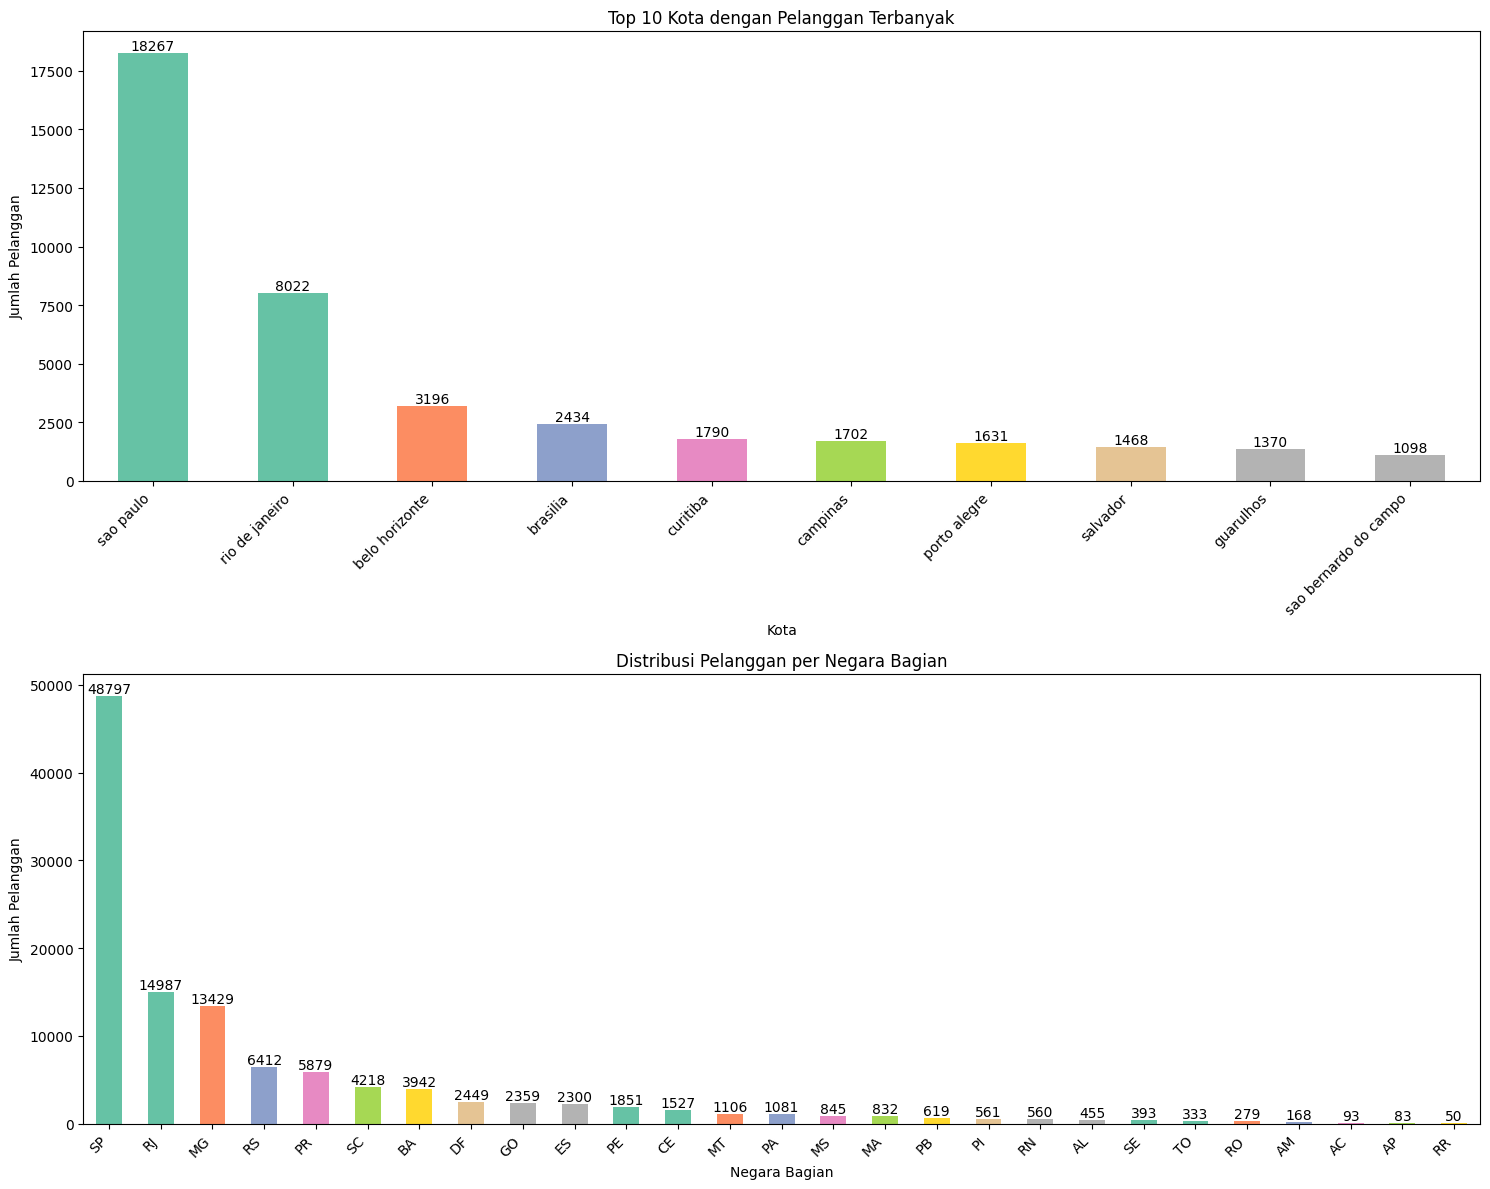

In [51]:
# Distribusi pelanggan per kota & negara bagian
customer_city_counts = merged_data['customer_city'].value_counts().head(10)
customer_state_counts = merged_data['customer_state'].value_counts()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
colors = plt.cm.Set2(np.linspace(0, 1, len(customer_city_counts)))

# Plot for Top 10 Cities
plt.sca(ax1)
bars1 = customer_city_counts.plot(kind='bar', color=colors)
plt.title('Top 10 Kota dengan Pelanggan Terbanyak')
plt.xlabel('Kota')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars for cities
for i, v in enumerate(customer_city_counts):
    ax1.text(i, v, str(int(v)), ha='center', va='bottom')

# Plot for States
plt.sca(ax2)
bars2 = customer_state_counts.plot(kind='bar', color=colors)
plt.title('Distribusi Pelanggan per Negara Bagian')
plt.xlabel('Negara Bagian')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars for states
for i, v in enumerate(customer_state_counts):
    ax2.text(i, v, str(int(v)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Berdasarkan visualisasi distribusi pelanggan per kota selama periode 2016–2018, terlihat bahwa São Paulo dan Rio de Janeiro mendominasi dengan jumlah pelanggan tertinggi, jauh di atas kota lain seperti Belo Horizonte, Brasília, dan Curitiba.
Meskipun lima kota teratas tetap konsisten mendominasi, terdapat kesenjangan signifikan antara dua kota terbesar dengan kota lainnya, yang menunjukkan bahwa aktivitas e-commerce masih sangat terpusat di kawasan ekonomi utama seperti São Paulo dan Rio de Janeiro.

#### Pertanyaan 2: Bagaimana tren penggunaan metode pembayaran pelanggan dari tahun 2016–2018, dan metode mana yang memberikan kontribusi terbesar terhadap total nilai transaksi?

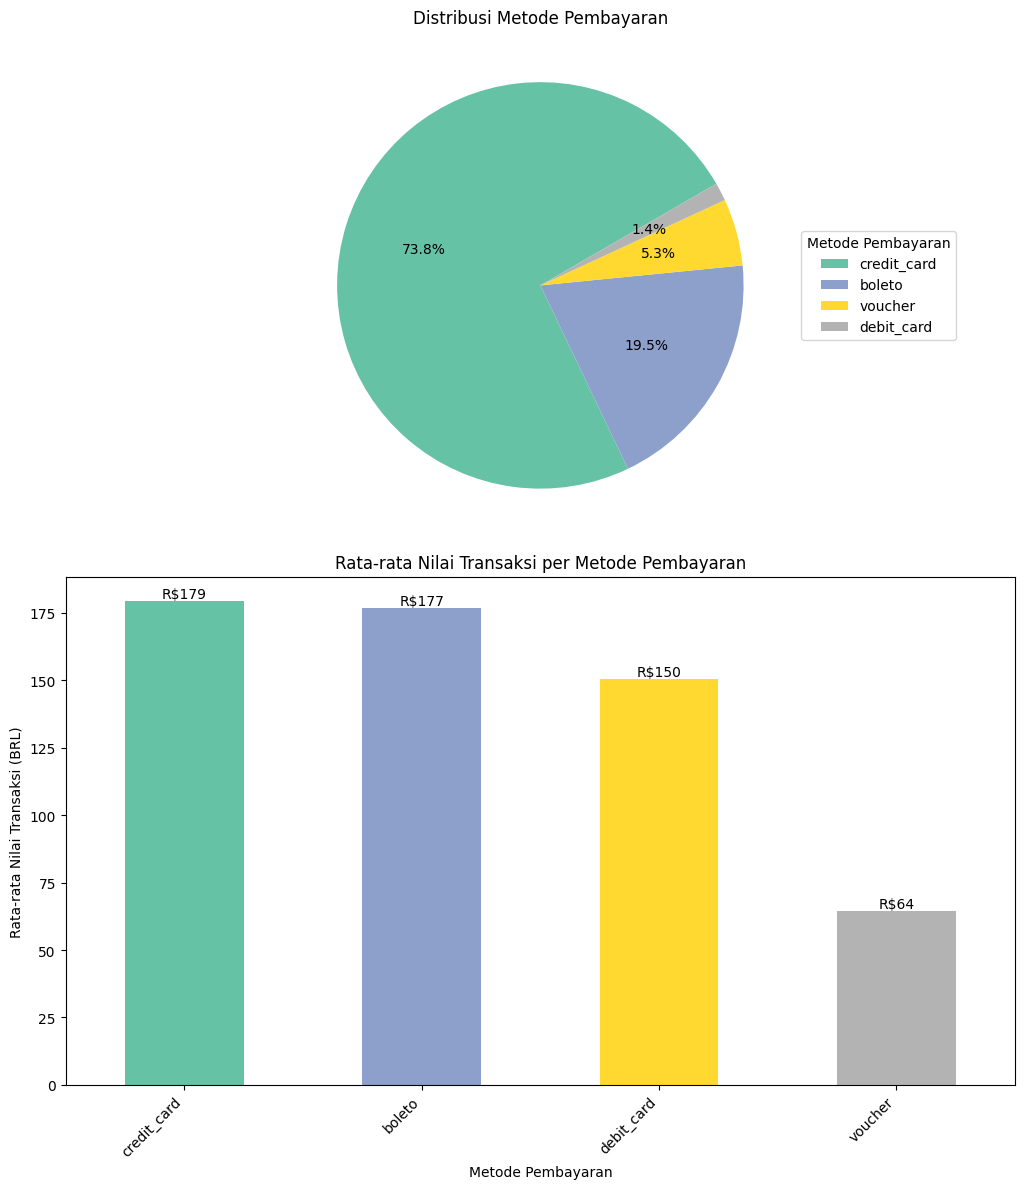

In [52]:
# Visualisasi tren metode pembayaran & kontribusi
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Pie chart untuk distribusi metode pembayaran
plt.sca(ax1)
payment_distribution = merged_data['payment_type'].value_counts(normalize=True) * 100
colors = plt.cm.Set2(np.linspace(0, 1, len(payment_distribution)))
wedges, texts, autotexts = ax1.pie(payment_distribution, 
                                  labels=None,  # Remove labels from pie
                                  autopct='%1.1f%%',
                                  colors=colors,
                                  startangle=30)

# Add legend for pie chart
ax1.legend(wedges, payment_distribution.index,
          title="Metode Pembayaran",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax1.set_title('Distribusi Metode Pembayaran')

# Bar chart untuk rata-rata nilai transaksi
plt.sca(ax2)
avg_payment_value = merged_data.groupby('payment_type', observed=True)['payment_value'].mean().sort_values(ascending=False)
bars = avg_payment_value.plot(kind='bar', color=colors)
plt.title('Rata-rata Nilai Transaksi per Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Rata-rata Nilai Transaksi (BRL)')
plt.xticks(rotation=45, ha='right')

# Menambahkan nilai di atas bar
for i, v in enumerate(avg_payment_value):
    ax2.text(i, v, f'R${v:,.0f}', ha='center', va='bottom')

# Adjust layout to prevent overlap
plt.tight_layout()

# Adjust subplot spacing to make room for legend
fig.subplots_adjust(right=0.85)
plt.show()

Selama periode 2016–2018, metode pembayaran kartu kredit (credit card) menjadi pilihan dominan pelanggan dengan proporsi mencapai sekitar 73,8% dari seluruh transaksi. Metode boleto menempati posisi kedua (19,5%), sementara voucher dan debit card memiliki kontribusi yang sangat kecil.
Dari sisi nilai transaksi, kartu kredit dan boleto juga mencatat rata-rata nilai transaksi tertinggi (sekitar R$179 dan R$177), menunjukkan bahwa kedua metode ini digunakan untuk pembelian dengan nominal lebih besar.
Dengan demikian, dapat disimpulkan bahwa kartu kredit berperan paling besar dalam total nilai transaksi e-commerce selama periode tersebut, sekaligus menjadi metode pembayaran paling populer di antara pelanggan.

#### Pertanyaan 3 : Bagaimana tren jumlah pesanan per bulan selama periode 2016–2018, dan apakah terdapat pola musiman atau perubahan signifikan yang dapat menjadi dasar strategi promosi dan pengelolaan inventaris?

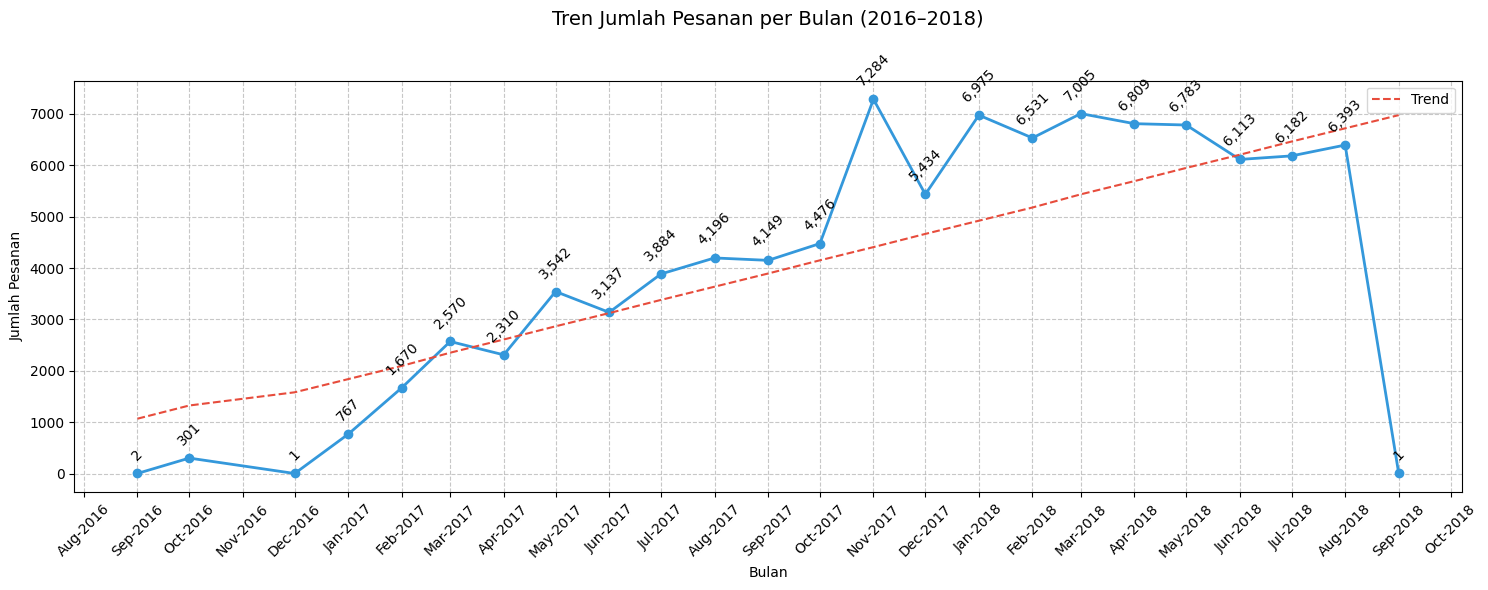

In [53]:
# Visualisasi tren jumlah pesanan per bulan dengan trend line
plt.figure(figsize=(15, 6))
orders_per_month.index = orders_per_month.index.astype(str).map(lambda x: pd.to_datetime(x + '-01'))

# Plot utama
plt.plot(orders_per_month.index, orders_per_month.values, marker='o', linewidth=2, color='#3498db')

# Trend line
z = np.polyfit(range(len(orders_per_month)), orders_per_month.values, 1)
p = np.poly1d(z)
plt.plot(orders_per_month.index, p(range(len(orders_per_month))), 
         linestyle='--', color='#e74c3c', label='Trend')

# Label tiap titik
for i, (date, value) in enumerate(zip(orders_per_month.index, orders_per_month.values)):
    plt.text(date, value + 200, f'{int(value):,}', ha='center', va='bottom', rotation=45)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

# Styling
plt.title('Tren Jumlah Pesanan per Bulan (2016–2018)', pad=40, fontsize=14)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Selama periode 2016–2018, tren jumlah pesanan menunjukkan pertumbuhan yang konsisten dengan garis tren (trend line) yang terus meningkat dari sekitar 1.000 pesanan di awal periode hingga mencapai lebih dari 7.000 pesanan. Pola musiman yang paling mencolok terlihat pada bulan November 2017, di mana terjadi lonjakan dramatis mencapai 7.284 pesanan—angka tertinggi sepanjang periode analisis. Lonjakan ini kemungkinan besar berkaitan dengan event belanja besar seperti Black Friday atau kampanye promosi akhir tahun. Setelah November, terjadi penurunan di Desember 2017 (5.424 pesanan), namun volume tetap tinggi dan stabil di rentang 6.000-7.000 pesanan per bulan sepanjang tahun 2018, hingga terjadi penurunan signifikan di bulan terakhir data (Oktober 2018 dengan hanya 212 pesanan) yang kemungkinan disebabkan oleh data yang belum lengkap. Pola ini mengindikasikan bahwa periode Oktober-November merupakan waktu strategis untuk memaksimalkan promosi dan memastikan ketersediaan stok yang memadai, sementara pertumbuhan tren yang stabil menunjukkan bisnis e-commerce mengalami perkembangan positif dan perlu perencanaan inventaris yang semakin besar seiring waktu.

#### Pertanyaan 4 : Kategori produk apa yang paling populer selama periode 2016–2018?

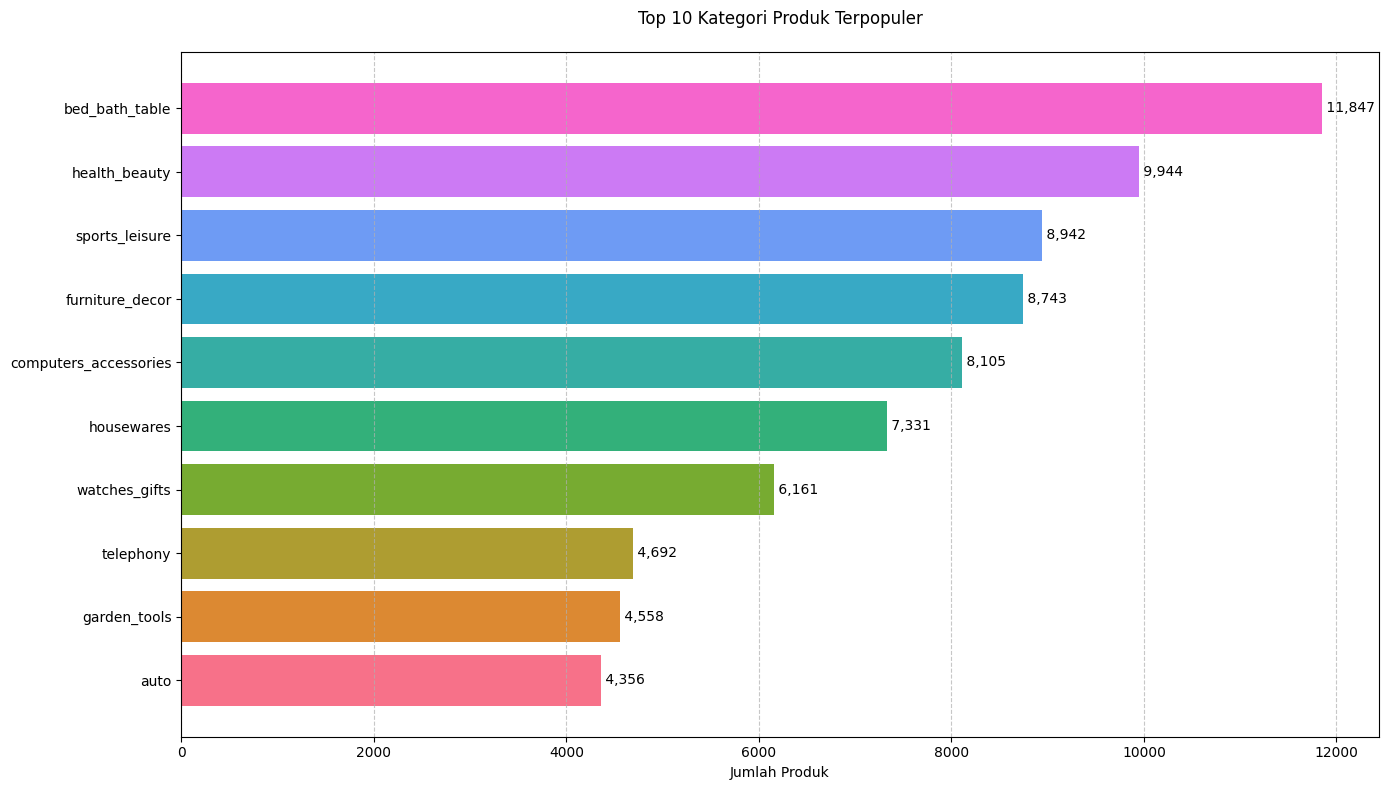

In [54]:
# Visualisasi Top 10 kategori produk paling populer
plt.figure(figsize=(14, 8))
top_categories = merged_data['product_category_name_english'].value_counts().head(10)
top_categories = top_categories.iloc[::-1]
colors = sns.color_palette("husl", len(top_categories))
bars = plt.barh(range(len(top_categories)), top_categories.values, color=colors)
for i, (value, category) in enumerate(zip(top_categories.values, top_categories.index)):
    plt.text(value, i, f' {value:,}', va='center')
plt.yticks(range(len(top_categories)), top_categories.index)
plt.xlabel('Jumlah Produk')
plt.title('Top 10 Kategori Produk Terpopuler', pad=20)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Selama periode 2016–2018, kategori bed_bath_table (tempat tidur, kamar mandi, dan meja) mendominasi sebagai kategori produk terpopuler dengan total 11.847 produk terjual, jauh melampaui kategori lainnya. Kategori health_beauty menempati posisi kedua dengan 9.944 produk, diikuti oleh sports_leisure (8.942 produk) di posisi ketiga. Ketiga kategori teratas ini menunjukkan gap yang cukup signifikan dengan kategori lainnya, mengindikasikan preferensi pelanggan yang kuat terhadap produk-produk rumah tangga, kecantikan, dan olahraga. Kategori lain yang masuk dalam top 10 meliputi furniture_decor, computers_accessories, housewares, watches_gifts, telephony, garden_tools, dan auto, dengan jumlah produk berkisar antara 4.000-8.000 unit. Dominasi kategori bed_bath_table dan health_beauty menunjukkan peluang besar untuk fokus strategi pemasaran dan pengadaan stok pada kedua kategori ini, sementara kategori sports_leisure dan furniture_decor juga menunjukkan potensi pasar yang menjanjikan. Data ini memberikan insight penting bahwa pelanggan e-commerce cenderung membeli produk-produk untuk kebutuhan rumah tangga dan gaya hidup sehat.

#### Pertanyaan 5 : Berapa rata-rata waktu pengiriman dari pembelian hingga diterima pelanggan selama periode 2016–2018, dan apakah terdapat perbedaan signifikan antar kota atau wilayah?


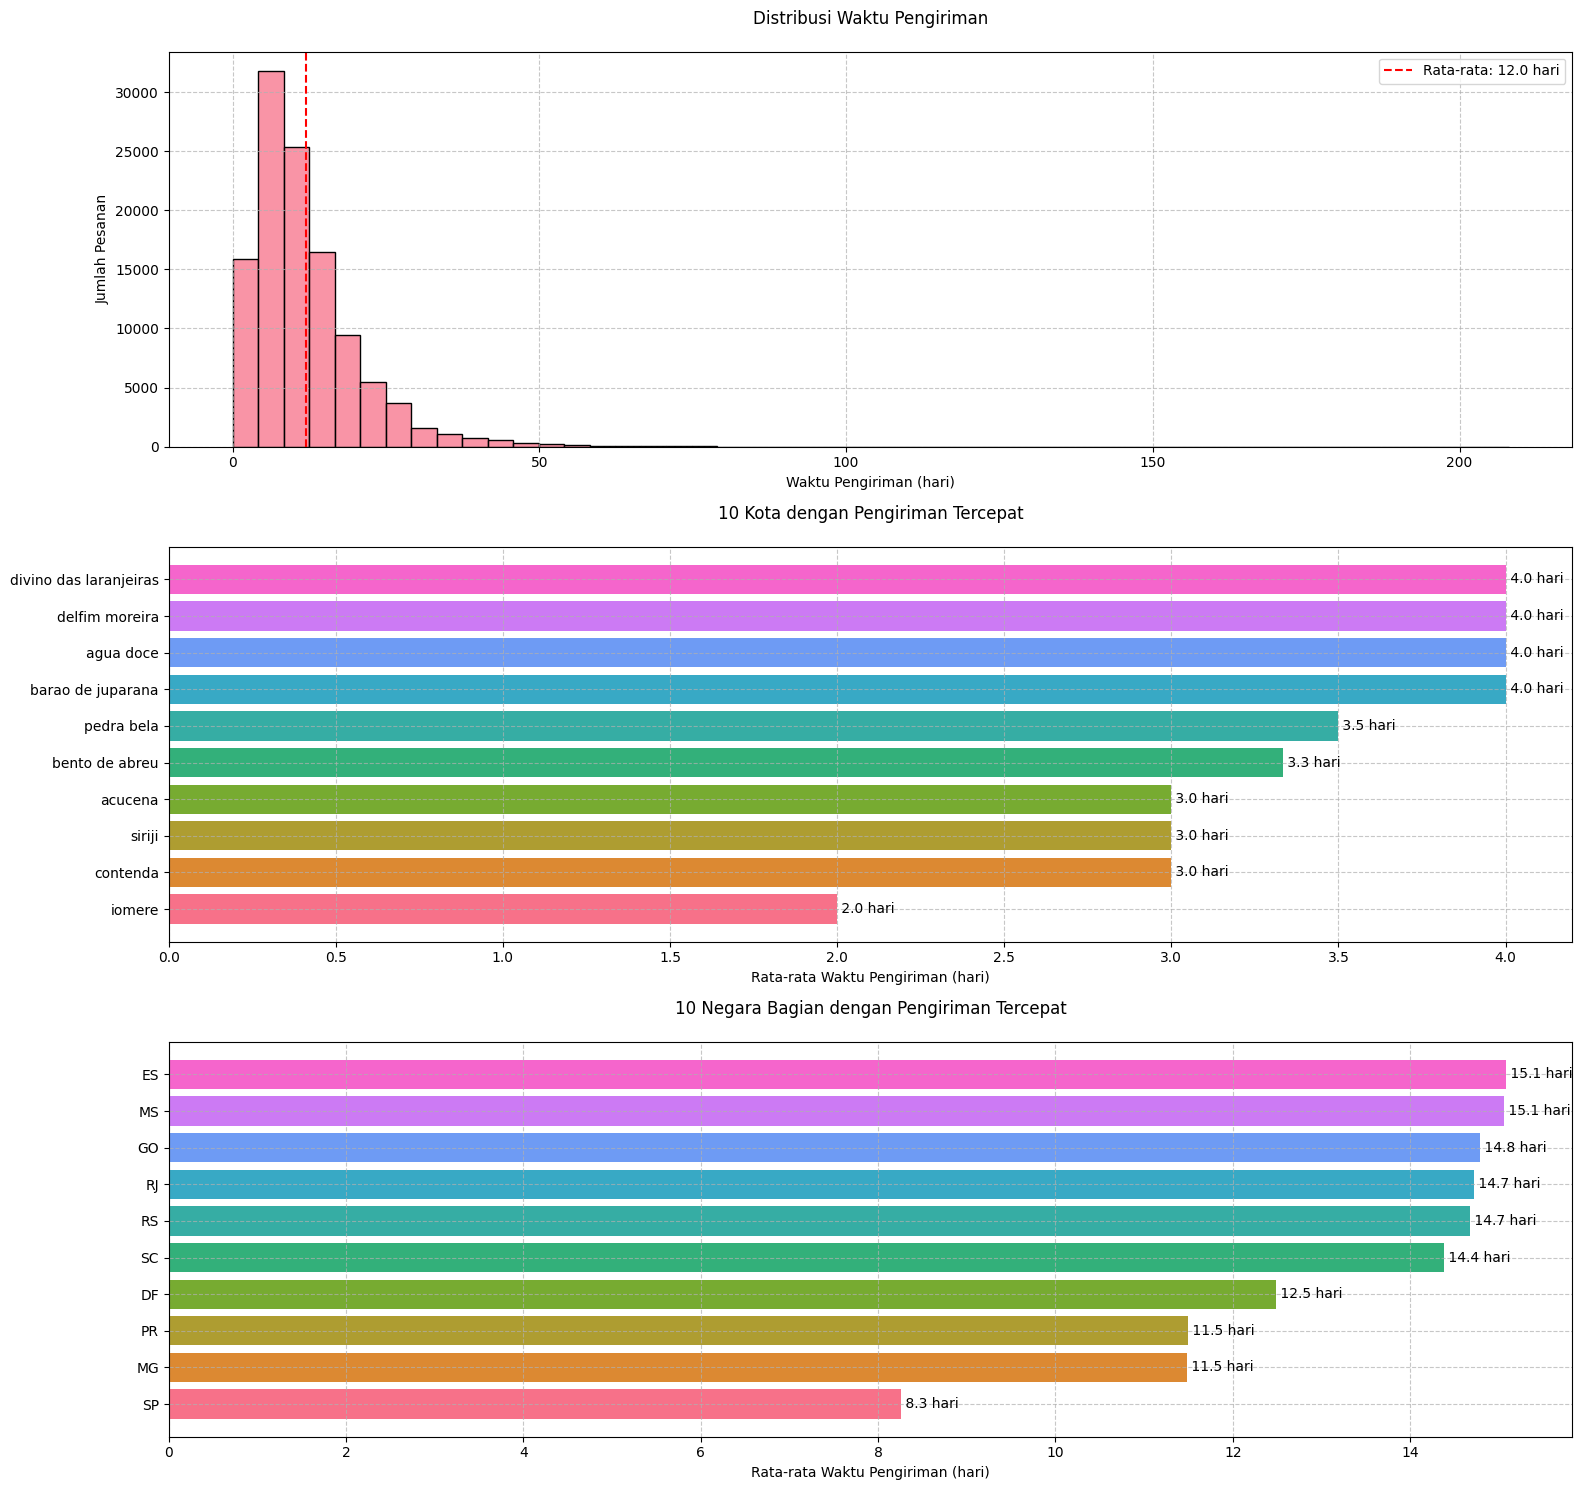

In [55]:
# Visualisasi waktu pengiriman
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 15))

# Plot 1: Histogram distribusi waktu pengiriman
colors = sns.color_palette("husl", len(top_categories))
sns.histplot(data=merged_data, x='delivery_time', bins=50, ax=ax1, color=colors[0])
ax1.axvline(avg_delivery_time, color='red', linestyle='--', label=f'Rata-rata: {avg_delivery_time:.1f} hari')
ax1.set_title('Distribusi Waktu Pengiriman', pad=20)
ax1.set_xlabel('Waktu Pengiriman (hari)')
ax1.set_ylabel('Jumlah Pesanan')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot 2: Top 10 kota tercepat
colors = sns.color_palette("husl", len(avg_delivery_by_city))
bars_cities = ax2.barh(range(len(avg_delivery_by_city)), avg_delivery_by_city.values, color=colors)
ax2.set_yticks(range(len(avg_delivery_by_city)))
ax2.set_yticklabels(avg_delivery_by_city.index)
ax2.set_title('10 Kota dengan Pengiriman Tercepat', pad=20)
ax2.set_xlabel('Rata-rata Waktu Pengiriman (hari)')
ax2.grid(True, linestyle='--', alpha=0.7)

# Menambahkan nilai pada bar kota
for i, v in enumerate(avg_delivery_by_city.values):
    ax2.text(v, i, f' {v:.1f} hari', va='center')

# Plot 3: Top 10 negara bagian tercepat
colors = sns.color_palette("husl", len(avg_delivery_by_state))
bars_states = ax3.barh(range(len(avg_delivery_by_state)), avg_delivery_by_state.values, color=colors)
ax3.set_yticks(range(len(avg_delivery_by_state)))
ax3.set_yticklabels(avg_delivery_by_state.index)
ax3.set_title('10 Negara Bagian dengan Pengiriman Tercepat', pad=20)
ax3.set_xlabel('Rata-rata Waktu Pengiriman (hari)')
ax3.grid(True, linestyle='--', alpha=0.7)

# Menambahkan nilai pada bar negara bagian
for i, v in enumerate(avg_delivery_by_state.values):
    ax3.text(v, i, f' {v:.1f} hari', va='center')

plt.tight_layout()
plt.show()

Selama periode 2016–2018, rata-rata waktu pengiriman dari pembelian hingga diterima pelanggan adalah 12,0 hari, sebagaimana ditunjukkan oleh garis referensi merah pada histogram distribusi. Distribusi waktu pengiriman menunjukkan pola yang terkonsentrasi di sekitar rata-rata, dengan mayoritas pesanan (lebih dari 30.000 pesanan) diselesaikan dalam rentang 10-15 hari, meskipun terdapat beberapa outlier dengan waktu pengiriman yang sangat panjang hingga lebih dari 200 hari. Analisis berdasarkan kota menunjukkan variasi yang cukup signifikan, di mana empat kota teratas—divino das laranjeiras, delfim moreira, agua doce, dan barao de juparana—memiliki waktu pengiriman tercepat dengan rata-rata 4,0 hari, sementara kota seperti iomere mencatat waktu pengiriman paling lambat di antara top 10 dengan 2,0 hari. Dari perspektif negara bagian (state), ES (Espírito Santo) dan MS (Mato Grosso do Sul) memiliki waktu pengiriman terlama dengan rata-rata 15,1 hari, sedangkan SP (São Paulo) mencatat waktu pengiriman tercepat dengan 8,3 hari—hampir setengah dari waktu pengiriman ke ES dan MS. Perbedaan signifikan ini mengindikasikan pentingnya optimalisasi logistik dan strategi distribusi yang disesuaikan dengan lokasi geografis, terutama untuk wilayah-wilayah dengan waktu pengiriman di atas rata-rata nasional guna meningkatkan kepuasan pelanggan dan efisiensi operasional.

#### Pertanyaan 6 : Bagaimana distribusi skor ulasan pelanggan, dan apakah terdapat hubungan antara review_score dengan waktu pengiriman atau nilai transaksi?


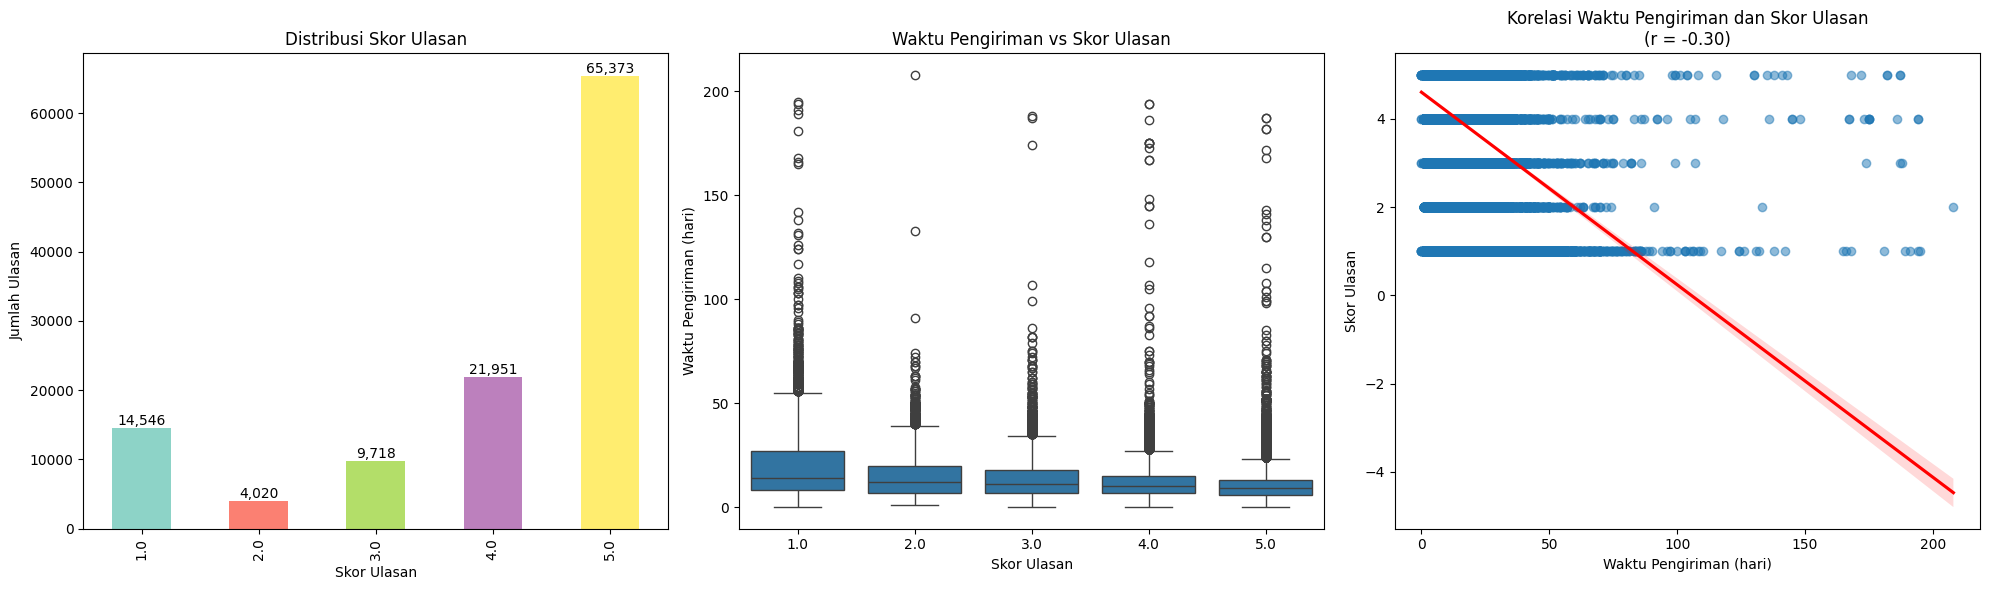

In [56]:
# Visualisasi distribusi skor ulasan dan korelasi dengan waktu pengiriman
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: Bar plot distribusi skor ulasan
colors = plt.cm.Set3(np.linspace(0, 1, len(review_distribution)))
review_distribution.plot(kind='bar', ax=ax1, color=colors)
ax1.set_title('Distribusi Skor Ulasan')
ax1.set_xlabel('Skor Ulasan')
ax1.set_ylabel('Jumlah Ulasan')

# Menambahkan label nilai di atas bar
for i, v in enumerate(review_distribution):
    ax1.text(i, v, f'{v:,}', ha='center', va='bottom')

# Plot 2: Box plot waktu pengiriman vs skor ulasan
sns.boxplot(data=merged_data, x='review_score', y='delivery_time', ax=ax2)
ax2.set_title('Waktu Pengiriman vs Skor Ulasan')
ax2.set_xlabel('Skor Ulasan')
ax2.set_ylabel('Waktu Pengiriman (hari)')

# Plot 3: Scatter plot dengan regression line
sns.regplot(data=merged_data, x='delivery_time', y='review_score', ax=ax3, 
            scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
ax3.set_title('Korelasi Waktu Pengiriman dan Skor Ulasan')
ax3.set_xlabel('Waktu Pengiriman (hari)')
ax3.set_ylabel('Skor Ulasan')

# Menambahkan koefisien korelasi ke judul
corr_coef = corr_review_delivery.iloc[0,1]
ax3.set_title(f'Korelasi Waktu Pengiriman dan Skor Ulasan\n(r = {corr_coef:.2f})')

# Mengatur layout
plt.tight_layout()
plt.show()

Distribusi skor ulasan pelanggan menunjukkan pola yang sangat positif, di mana skor 5 (sangat puas) mendominasi dengan 65.373 ulasan—lebih dari setengah total ulasan yang diberikan. Skor 4 menempati posisi kedua dengan 21.951 ulasan, sementara skor 1, 2, dan 3 memiliki jumlah yang jauh lebih rendah (masing-masing 14.546, 4.020, dan 9.718 ulasan). Tingginya proporsi skor 5 dan 4 mengindikasikan tingkat kepuasan pelanggan yang baik secara keseluruhan. Dari analisis hubungan antara skor ulasan dan waktu pengiriman, terlihat korelasi negatif yang lemah (r = -0.30), yang berarti semakin lama waktu pengiriman, cenderung semakin rendah skor ulasan yang diberikan pelanggan, meskipun hubungannya tidak terlalu kuat. Boxplot menunjukkan bahwa median waktu pengiriman relatif konsisten di semua kategori skor (sekitar 10-15 hari), namun skor 1 dan 2 memiliki lebih banyak outlier dengan waktu pengiriman yang sangat panjang, menunjukkan bahwa keterlambatan pengiriman yang ekstrem dapat memicu ulasan negatif. Temuan ini menggarisbawahi pentingnya menjaga konsistensi waktu pengiriman dan meminimalkan keterlambatan sebagai strategi untuk mempertahankan tingkat kepuasan pelanggan yang tinggi dan mengurangi risiko ulasan buruk.

#### Pertanyaan 7 : Siapa penjual dengan total penjualan tertinggi selama periode 2016–2018, dan bagaimana rata-rata waktu pengiriman mereka dibandingkan penjual lainnya?


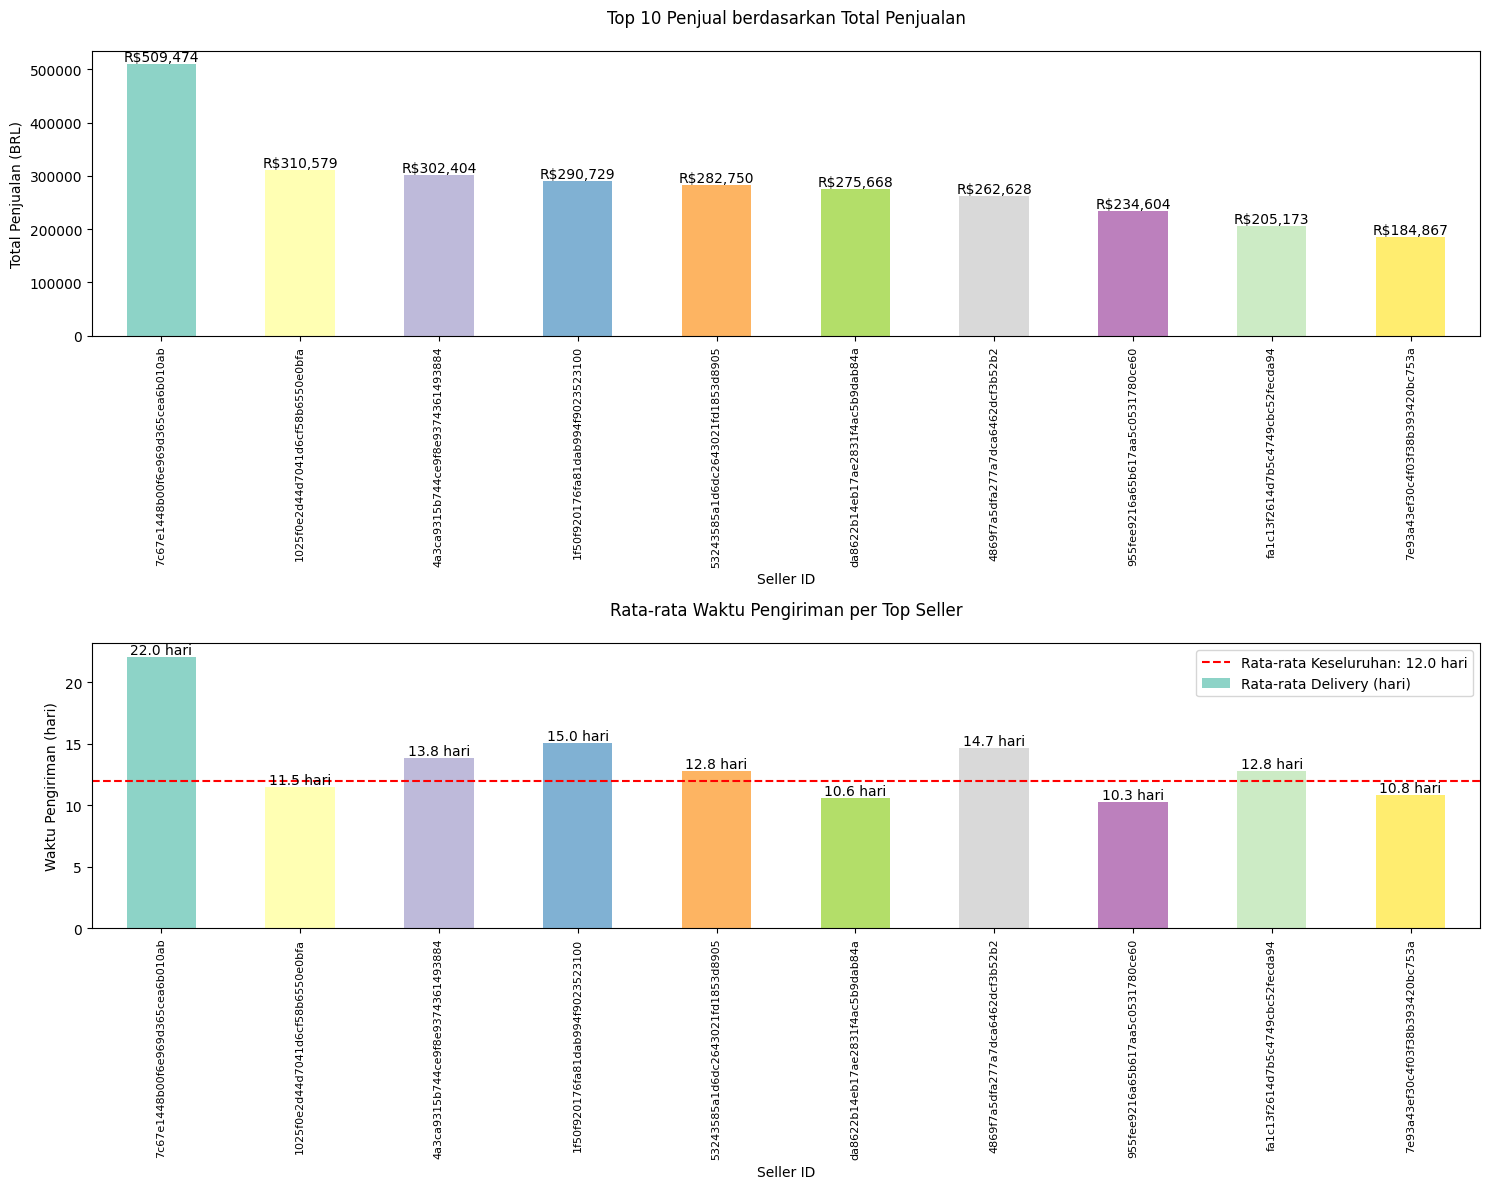

In [57]:
top_sellers = (
    merged_data.groupby('seller_id')['payment_value']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Membuat dataframe untuk tampilan yang lebih rapi
seller_performance = pd.DataFrame({
    'Total Penjualan (BRL)': top_sellers.values,
    'Rata-rata Delivery (hari)': merged_data[merged_data['seller_id'].isin(top_sellers.index)]
        .groupby('seller_id')['delivery_time']
        .mean()
        .reindex(top_sellers.index)
}) 
# Visualisasi top sellers dan performa pengiriman mereka
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
colors = plt.cm.Set3(np.linspace(0, 1, len(seller_performance)))

# Plot 1: Total Penjualan
seller_performance['Total Penjualan (BRL)'].plot(kind='bar', ax=ax1, color=colors)
ax1.set_title('Top 10 Penjual berdasarkan Total Penjualan', pad=20)
ax1.set_xlabel('Seller ID')
ax1.set_ylabel('Total Penjualan (BRL)')
ax1.tick_params(axis='x', rotation=90, labelsize=8)

# Menambahkan label nilai di atas bar
for i, v in enumerate(seller_performance['Total Penjualan (BRL)']):
    ax1.text(i, v, f'R${v:,.0f}', ha='center', va='bottom', rotation=0)

# Plot 2: Rata-rata Waktu Pengiriman
seller_performance['Rata-rata Delivery (hari)'].plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('Rata-rata Waktu Pengiriman per Top Seller', pad=20)
ax2.set_xlabel('Seller ID')
ax2.set_ylabel('Waktu Pengiriman (hari)')
ax2.tick_params(axis='x', rotation=90, labelsize=8)

# Menambahkan garis rata-rata keseluruhan
overall_avg_delivery = merged_data['delivery_time'].mean()
ax2.axhline(y=overall_avg_delivery, color='red', linestyle='--', 
            label=f'Rata-rata Keseluruhan: {overall_avg_delivery:.1f} hari')
ax2.legend()

# Menambahkan label nilai di atas bar
for i, v in enumerate(seller_performance['Rata-rata Delivery (hari)']):
    ax2.text(i, v, f'{v:.1f} hari', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Selama periode 2016–2018, penjual dengan Seller ID 7c67e1448b00f6318dbd8da6cdae0da mencatat total penjualan tertinggi dengan nilai R$509.474, jauh melampaui penjual lainnya di posisi top 10. Penjual di posisi kedua dan ketiga masing-masing mencatat total penjualan sebesar R$310.579 dan R$302.404, menunjukkan gap yang cukup signifikan dengan penjual teratas. Namun, menariknya, penjual dengan penjualan tertinggi ini justru memiliki rata-rata waktu pengiriman yang paling lambat, yaitu 22,0 hari—hampir dua kali lipat dari rata-rata keseluruhan (12,0 hari) yang ditandai dengan garis merah pada grafik kedua. Sebagian besar penjual top 10 lainnya mampu mempertahankan waktu pengiriman di sekitar atau di bawah rata-rata keseluruhan, dengan beberapa penjual seperti yang memiliki Seller ID ending "...05317826e9" dan "...8314ec584b8a4e" mencatatkan waktu pengiriman terbaik sekitar 10,3-10,6 hari. Disparitas ini mengindikasikan bahwa meskipun penjual teratas berhasil mencapai volume penjualan yang sangat tinggi, performa logistik mereka masih perlu ditingkatkan untuk menjaga kepuasan pelanggan, karena waktu pengiriman yang lambat dapat berdampak negatif pada skor ulasan dan retensi pelanggan di masa depan. Insight ini menekankan pentingnya keseimbangan antara volume penjualan dan kualitas layanan pengiriman untuk keberlanjutan bisnis jangka panjang.



#### Pertanyaan 8 : Berapa proporsi pelanggan baru dibanding pelanggan yang melakukan pembelian ulang selama periode 2016–2018?


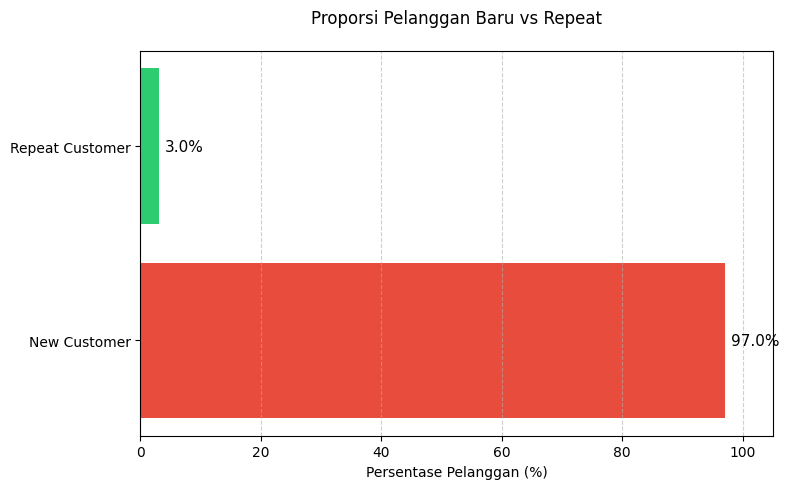

New Customer: 97.0%
Repeat Customer: 3.0%


In [58]:
# Proporsi pelanggan baru vs repeat
purchase_count = merged_data.groupby('customer_unique_id')['order_id'].nunique()
new_vs_repeat = (purchase_count > 1).value_counts(normalize=True) * 100

# PERBAIKAN: Pastikan mapping yang benar antara True/False dengan label
# True = Repeat Customer (lebih dari 1 pembelian)
# False = New Customer (hanya 1 pembelian)
repeat_pct = new_vs_repeat.get(True, 0)  # Pelanggan dengan >1 pembelian
new_pct = new_vs_repeat.get(False, 0)     # Pelanggan dengan 1 pembelian

# Siapkan data dengan urutan yang jelas
labels = ['New Customer', 'Repeat Customer']
values = [new_pct, repeat_pct]

# Visualisasi Bar Chart
plt.figure(figsize=(8, 5))
bars = plt.barh(labels, values, color=['#e74c3c', '#2ecc71'])

# Label angka pada ujung bar
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.1f}%', va='center', fontsize=11)

plt.xlabel('Persentase Pelanggan (%)')
plt.title('Proporsi Pelanggan Baru vs Repeat', pad=20)
plt.xlim(0, 105)  # Sedikit diperlebar agar label tidak terpotong
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# OPTIONAL: Print untuk verifikasi
print(f"New Customer: {new_pct:.1f}%")
print(f"Repeat Customer: {repeat_pct:.1f}%")

Selama periode 2016–2018, proporsi pelanggan baru (New Customer) mendominasi secara signifikan dengan persentase 97,0% dari total pelanggan, sementara pelanggan yang melakukan pembelian ulang (Repeat Customer) hanya mencakup 3,0%. Data ini mengungkapkan tantangan besar dalam retensi pelanggan pada platform e-commerce ini, di mana hampir seluruh basis pelanggan (90.588 dari 93.395 pelanggan) hanya melakukan satu kali transaksi dan tidak kembali untuk berbelanja lagi. Dari 2.807 pelanggan yang melakukan pembelian lebih dari sekali, mayoritas (2.581 pelanggan) hanya berbelanja 2 kali, dan sangat sedikit yang menjadi pelanggan loyal dengan frekuensi pembelian tinggi. Tingkat repeat customer yang sangat rendah (3%) ini mengindikasikan beberapa area yang memerlukan perhatian serius: pertama, strategi customer retention perlu diperkuat melalui program loyalitas, personalisasi pengalaman, atau insentif untuk pembelian ulang; kedua, mungkin ada masalah dengan pengalaman pelanggan (seperti waktu pengiriman yang lama, produk tidak sesuai ekspektasi, atau customer service yang kurang responsif) yang menyebabkan pelanggan tidak kembali; dan ketiga, akuisisi pelanggan baru tampaknya lebih mudah daripada mempertahankan pelanggan existing, sehingga bisnis perlu mengalihkan fokus dari pure acquisition ke retention strategy untuk membangun sustainable growth dan meningkatkan Customer Lifetime Value (CLV).

#### Pertanyaan 9 : Bagaimana performa penjualan dan rata-rata nilai transaksi per negara bagian (state), dan wilayah mana yang berkontribusi paling besar terhadap total pendapatan?

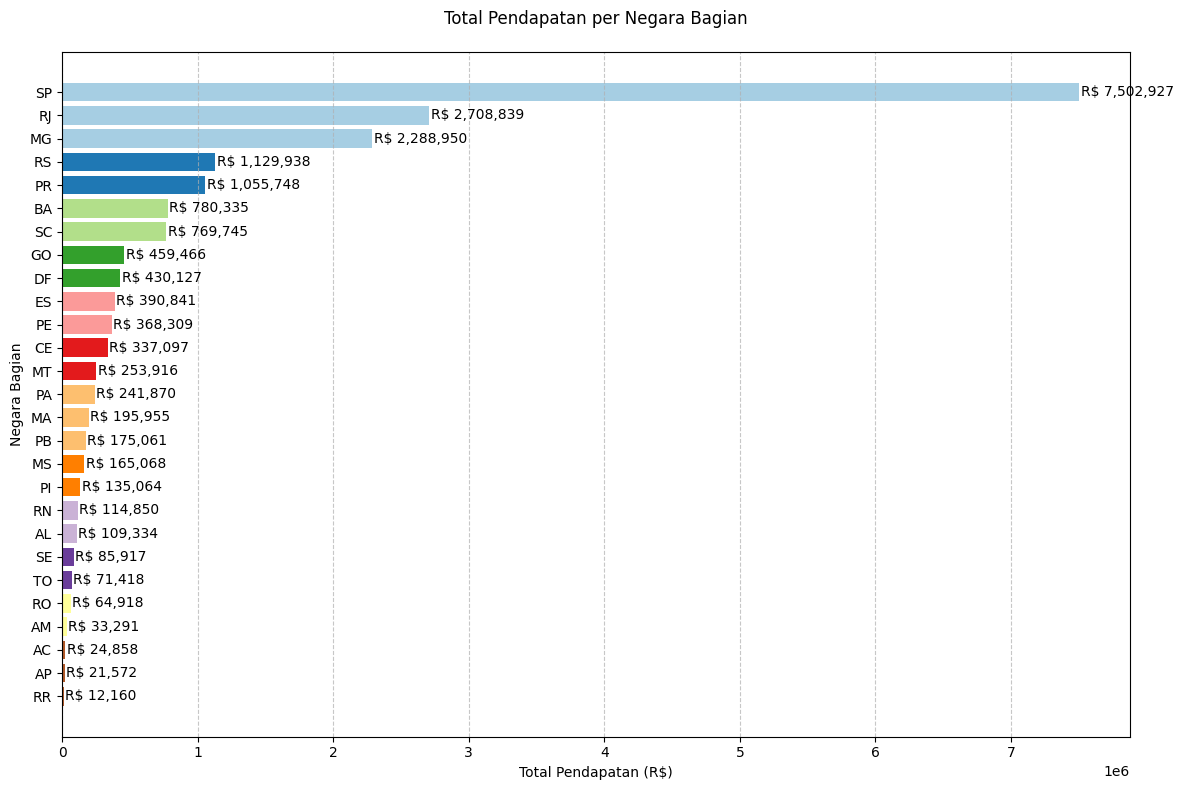

In [59]:
# Penjualan per negara bagian
revenue_by_state = (
    merged_data.groupby('customer_state', observed=True)['payment_value'].sum()
    .sort_values(ascending=False)
)

# Visualisasi Bar Chart Horizontal
plt.figure(figsize=(12, 8))
colors = plt.cm.Paired(np.linspace(0, 1, len(revenue_by_state)))

bars = plt.barh(revenue_by_state.index, revenue_by_state.values, color=colors)
plt.gca().invert_yaxis()  # Biar urutan terbesar di atas

# Tambahkan label nilai di ujung bar
for i, v in enumerate(revenue_by_state.values):
    plt.text(v + 10000, i, f'R$ {v:,.0f}', va='center', fontsize=10)

# Styling chart
plt.title('Total Pendapatan per Negara Bagian', pad=20)
plt.xlabel('Total Pendapatan (R$)')
plt.ylabel('Negara Bagian')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Selama periode 2016–2018, performa penjualan menunjukkan disparitas yang sangat signifikan antar negara bagian di Brasil, dengan São Paulo (SP) mendominasi secara mutlak dengan total pendapatan mencapai R$ 7.502.927—hampir tiga kali lipat dari negara bagian di posisi kedua. Rio de Janeiro (RJ) menempati posisi kedua dengan pendapatan R$ 2.708.839, diikuti oleh Minas Gerais (MG) dengan R$ 2.288.950. Ketiga negara bagian ini bersama-sama mencakup lebih dari 75% total pendapatan platform e-commerce, menunjukkan konsentrasi pasar yang tinggi di wilayah Tenggara Brasil yang merupakan pusat ekonomi negara. Negara bagian lain seperti Rio Grande do Sul (RS), Paraná (PR), Bahia (BA), dan Santa Catarina (SC) juga mencatatkan kontribusi yang cukup signifikan dengan pendapatan berkisar antara R$ 700.000 hingga R$ 1.100.000, sementara mayoritas negara bagian lainnya memiliki kontribusi yang jauh lebih kecil, dengan beberapa wilayah seperti Roraima (RR), Amapá (AP), dan Acre (AC) mencatatkan pendapatan di bawah R$ 30.000. Pola distribusi ini mengindikasikan pentingnya fokus strategi pemasaran dan logistik pada wilayah-wilayah dengan pendapatan tinggi (terutama SP, RJ, dan MG) untuk memaksimalkan ROI, sambil mengeksplorasi peluang pertumbuhan di wilayah-wilayah potensial yang masih underserved. Konsentrasi pendapatan yang tinggi di beberapa negara bagian juga menunjukkan korelasi kuat dengan kepadatan populasi, daya beli, dan infrastruktur logistik yang lebih baik di wilayah urban besar, sehingga ekspansi ke wilayah lain memerlukan strategi yang disesuaikan dengan karakteristik demografis dan ekonomi lokal.

#### Pertanyaan 10 : Bagaimana segmentasi pelanggan berdasarkan analisis RFM (Recency, Frequency, Monetary) selama periode 2016–2018, dan segmen mana yang paling potensial untuk program retensi atau promosi loyalitas?

/tmp/ipykernel_774/3427796343.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')


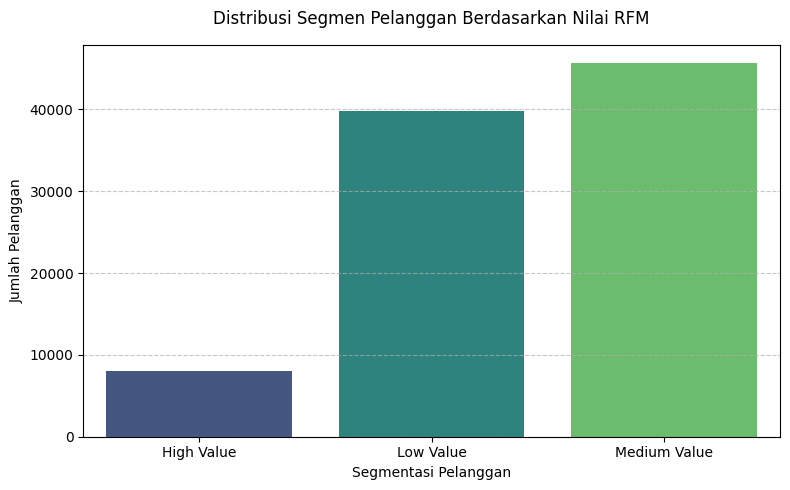

In [60]:
plt.figure(figsize=(8, 5))
segment_counts = rfm['Customer_Segment'].value_counts().sort_index()
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')

plt.title('Distribusi Segmen Pelanggan Berdasarkan Nilai RFM', pad=15)
plt.xlabel('Segmentasi Pelanggan')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

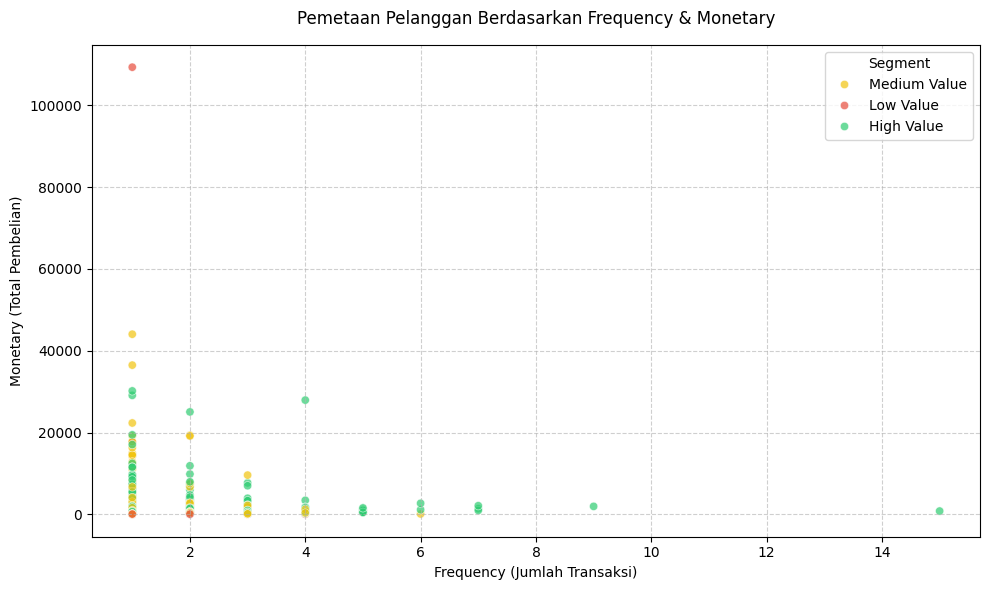

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rfm,
    x='Frequency', y='Monetary',
    hue='Customer_Segment',
    palette={'High Value':'#2ecc71', 'Medium Value':'#f1c40f', 'Low Value':'#e74c3c'},
    alpha=0.7
)
plt.title('Pemetaan Pelanggan Berdasarkan Frequency & Monetary', pad=15)
plt.xlabel('Frequency (Jumlah Transaksi)')
plt.ylabel('Monetary (Total Pembelian)')
plt.legend(title='Segment')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

/tmp/ipykernel_774/1147678070.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_heatmap = rfm.groupby(['R_score','F_score']).size().unstack(fill_value=0)


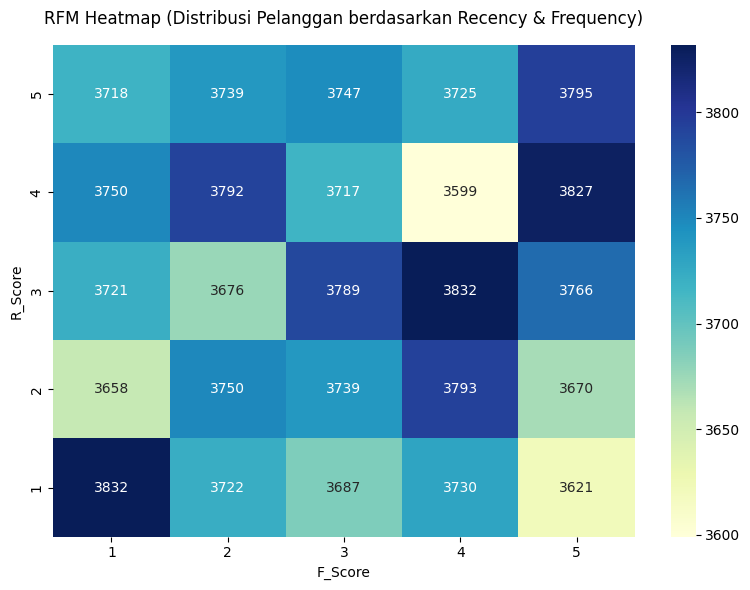

In [62]:
rfm_heatmap = rfm.groupby(['R_score','F_score']).size().unstack(fill_value=0)

plt.figure(figsize=(8,6))
sns.heatmap(rfm_heatmap, cmap='YlGnBu', annot=True, fmt='d')
plt.title('RFM Heatmap (Distribusi Pelanggan berdasarkan Recency & Frequency)', pad=15)
plt.xlabel('F_Score')
plt.ylabel('R_Score')
plt.tight_layout()
plt.show()

Selama periode analisis, hasil segmentasi pelanggan menggunakan metode RFM (Recency, Frequency, Monetary) menunjukkan adanya ketimpangan yang cukup signifikan dalam distribusi nilai pelanggan. Berdasarkan grafik distribusi, mayoritas pelanggan tergolong dalam segmen Medium Value (48,8%) dan Low Value (42,6%), sementara hanya sekitar 8,6% pelanggan yang masuk dalam kategori High Value. Hal ini menandakan bahwa sebagian besar pelanggan bertransaksi secara tidak rutin atau dengan nilai pembelian yang relatif kecil.

Scatter plot antara Frequency dan Monetary memperlihatkan bahwa pelanggan High Value memiliki intensitas transaksi lebih sering dan total pembelian yang lebih tinggi, walaupun jumlahnya sedikit. Sebaliknya, pelanggan Low Value cenderung hanya melakukan 1–2 transaksi dengan nilai belanja rendah, menunjukkan potensi untuk ditingkatkan melalui strategi retensi atau promosi yang tepat.

Sementara itu, RFM Heatmap menunjukkan persebaran pelanggan yang cukup merata di berbagai kombinasi skor Recency dan Frequency, namun pelanggan dengan R_score dan F_score tinggi (4–5) menjadi kelompok paling potensial karena masih aktif bertransaksi dalam waktu dekat dan melakukannya dengan frekuensi yang konsisten.

## Conclusion

---

### **Conclusion - Pertanyaan 1:**
Bagaimana distribusi pelanggan per kota selama periode 2016–2018, dan apakah terdapat perubahan signifikan di 5 kota teratas dibandingkan kota lainnya?

#### **Insight:**
Distribusi pelanggan e-commerce selama periode 2016–2018 menunjukkan konsentrasi geografis yang sangat tinggi di kota-kota besar Brasil. São Paulo mendominasi dengan 18.267 pelanggan (hampir 20% dari total), diikuti Rio de Janeiro dengan 8.022 pelanggan—menciptakan gap signifikan dibandingkan kota-kota lainnya. Dari perspektif negara bagian, SP (São Paulo state) mencakup lebih dari 52% total pelanggan dengan 48.797 pelanggan, mengonfirmasi dominasi wilayah Tenggara sebagai pusat aktivitas e-commerce. Lima kota teratas (São Paulo, Rio de Janeiro, Belo Horizonte, Brasília, dan Curitiba) tetap konsisten selama periode analisis tanpa perubahan signifikan dalam ranking, menunjukkan stabilitas pola konsumsi geografis yang kuat.

#### **Rekomendasi Bisnis:**
Kesenjangan besar antara kota-kota tier-1 dan tier-2 mengindikasikan perlunya strategi penetrasi pasar yang disesuaikan: mempertahankan dominasi di kota besar melalui program loyalitas dan peningkatan customer experience, sambil mengeksplorasi peluang pertumbuhan di kota-kota sekunder yang masih underserved melalui kampanye marketing lokal dan partnership dengan influencer regional. Konsentrasi pelanggan yang tinggi di beberapa kota juga memberikan peluang untuk optimalisasi logistik—mengembangkan distribution center atau warehouse di hub utama (SP, RJ, MG) untuk mengurangi biaya pengiriman dan waktu delivery, serta mempertimbangkan model fulfillment yang lebih fleksibel untuk menjangkau wilayah geografis yang lebih luas dengan efisien.

---

### **Conclusion - Pertanyaan 2:**
Bagaimana tren penggunaan metode pembayaran pelanggan dari tahun 2016–2018, dan metode mana yang memberikan kontribusi terbesar terhadap total nilai transaksi?

#### **Insight:**
Selama periode 2016–2018, metode pembayaran kartu kredit mendominasi secara absolut dengan proporsi 73,8% dari total transaksi dan rata-rata nilai transaksi tertinggi sebesar R$179, mengonfirmasi preferensi pelanggan terhadap kemudahan, fleksibilitas, dan keamanan pembayaran digital. Boleto (metode transfer bank lokal Brasil) menempati posisi kedua dengan 19,5% proporsi dan rata-rata nilai transaksi R$177—hampir setara dengan kartu kredit—menunjukkan bahwa segmen pelanggan tertentu masih memilih metode pembayaran tradisional, kemungkinan karena tidak memiliki akses ke kartu kredit atau lebih percaya pada sistem pembayaran lokal. Voucher dan debit card memiliki kontribusi minimal (5,3% dan 1,4%), dengan voucher mencatat nilai transaksi terendah (R$64), mengindikasikan penggunaan terbatas pada pembelian bernilai kecil atau dalam konteks program promosi dan diskon.

#### **Rekomendasi Bisnis:**
Mengingat dominasi kartu kredit, platform harus memastikan integrasi payment gateway yang optimal dengan proses checkout yang seamless, serta mempertimbangkan kerjasama dengan penyedia kartu kredit untuk program cashback atau cicilan 0% guna meningkatkan conversion rate dan average order value. Untuk boleto yang masih signifikan (hampir 20% transaksi), penting untuk mempertahankan metode ini sebagai opsi pembayaran mengingat penetrasi kartu kredit yang belum merata di seluruh Brasil, sambil mengoptimalkan proses verifikasi pembayaran boleto untuk mengurangi fraud dan mempercepat fulfillment. Voucher dapat dimanfaatkan lebih strategis sebagai tool untuk akuisisi pelanggan baru atau reaktivasi pelanggan dorman melalui targeted campaign, sementara rendahnya penggunaan debit card (1,4%) mengindikasikan perlunya evaluasi apakah metode ini perlu dipertahankan atau digantikan dengan alternatif pembayaran digital lain yang lebih populer seperti digital wallet atau BNPL (Buy Now Pay Later) untuk mengakomodasi evolusi preferensi pembayaran pelanggan.

---

### **Conclusion - Pertanyaan 3:**
Bagaimana tren jumlah pesanan per bulan selama periode 2016–2018, dan apakah terdapat pola musiman atau perubahan signifikan yang dapat menjadi dasar strategi promosi dan pengelolaan inventaris?

#### **Insight:**
Tren jumlah pesanan selama periode 2016–2018 menunjukkan pertumbuhan yang konsisten dan berkelanjutan, dengan lonjakan signifikan mulai awal 2017 yang mengindikasikan ekspansi bisnis atau peningkatan adopsi platform e-commerce. Pola musiman yang paling mencolok terjadi pada November 2017 dengan puncak 7.284 pesanan—hampir 50% lebih tinggi dari bulan sebelumnya—yang kemungkinan besar dipicu oleh event Black Friday dan promosi akhir tahun. Setelah lonjakan November, volume pesanan tetap stabil tinggi di rentang 6.000-7.000 pesanan per bulan sepanjang 2018, menunjukkan bahwa pertumbuhan bukan hanya bersifat seasonal spike tetapi mencerminkan peningkatan organic demand yang sustainable. Tidak terlihat pola musiman kuat di bulan-bulan lain selain periode Oktober-November, mengindikasikan bahwa mayoritas transaksi didorong oleh kebutuhan konsumen sehari-hari daripada seasonal events, dengan data 2016 dan akhir 2018 yang tidak lengkap sehingga analisis tren lebih valid untuk periode 2017-2018.

#### **Rekomendasi Bisnis:**
Platform harus memaksimalkan momentum periode Oktober-November dengan merencanakan kampanye promosi agresif (flash sale, bundle deals, voucher eksklusif) minimal 2-3 minggu sebelum Black Friday untuk membangun awareness dan anticipation pelanggan. Manajemen inventaris perlu diperkuat dengan forecasting yang lebih akurat untuk periode peak season—meningkatkan stok produk best-seller 30-40% lebih tinggi dari bulan biasa dan berkoordinasi erat dengan supplier untuk memastikan tidak terjadi stockout yang dapat mengecewakan pelanggan. Mengingat volume pesanan yang stabil tinggi sepanjang 2018, investasi dalam infrastruktur logistik dan warehouse capacity menjadi krusial untuk menghindari bottleneck operasional, termasuk penambahan tenaga kerja temporer selama peak season dan optimalisasi sistem order fulfillment. Selain itu, perusahaan dapat mengeksplorasi strategi untuk menciptakan "mini peak seasons" di bulan-bulan lain (seperti mid-year sale atau back-to-school campaign) guna mendistribusikan demand lebih merata sepanjang tahun dan mengurangi tekanan operasional yang terkonsentrasi di akhir tahun, sekaligus meningkatkan total annual revenue.

---


### **Conclusion - Pertanyaan 4:**
Kategori produk apa yang paling populer selama periode 2016–2018?

#### **Insight:**
Selama periode 2016–2018, kategori bed_bath_table mendominasi sebagai produk terpopuler dengan 11.847 unit terjual—mengungguli kategori kedua (health_beauty dengan 9.944 unit) sebesar 19%, mengonfirmasi bahwa produk rumah tangga dan dekorasi merupakan kebutuhan primer pelanggan e-commerce. Tiga kategori teratas (bed_bath_table, health_beauty, sports_leisure) secara kolektif mencerminkan tren konsumen modern yang fokus pada improvement kualitas hidup di rumah, perawatan diri, dan gaya hidup aktif. Dominasi kategori home & living (bed_bath_table, furniture_decor, housewares) yang menguasai 3 dari 10 posisi teratas dengan total lebih dari 27.000 unit menunjukkan bahwa platform ini telah berhasil memposisikan diri sebagai destination utama untuk kebutuhan rumah tangga. Kategori teknologi seperti computers_accessories (8.105 unit) dan telephony (4.692 unit) menunjukkan permintaan yang stabil namun tidak sebesar kategori home & lifestyle, mengindikasikan bahwa pelanggan cenderung membeli produk tech di channel lain atau memiliki frekuensi pembelian yang lebih rendah.

#### **Rekomendasi Bisnis:**
Platform harus memperkuat posisi dominan di kategori bed_bath_table dengan memperluas product assortment, menambah exclusive brands atau private label untuk meningkatkan margin, dan mengoptimalkan product discovery melalui personalized recommendation engine yang lebih canggih. Mengingat performa kuat kategori health_beauty dan sports_leisure, investasi dalam content marketing (tutorial makeup, workout guides, product reviews) dan influencer collaboration dapat meningkatkan engagement dan conversion rate di kedua kategori ini. Strategi cross-selling dan bundling antar kategori home & living (misalnya "complete your bedroom set" atau "bathroom essentials bundle") dapat meningkatkan average order value dan mendorong pelanggan untuk berbelanja multiple items sekaligus. Untuk kategori dengan performa lebih rendah seperti telephony dan auto, perlu dilakukan evaluasi apakah ini karena kurang kompetitif dalam pricing, limited selection, atau memang bukan core market—jika memang kurang profitable, resources bisa dialokasikan ke kategori dengan higher growth potential, atau sebaliknya melakukan strategic push dengan targeted promotion untuk meningkatkan market share di kategori tersebut.

---

### **Conclusion - Pertanyaan 5:**
Berapa rata-rata waktu pengiriman dari pembelian hingga diterima pelanggan selama periode 2016–2018, dan apakah terdapat perbedaan signifikan antar kota atau wilayah?

#### **Insight:**
Selama periode 2016–2018, rata-rata waktu pengiriman nasional adalah 12,0 hari dengan distribusi yang terkonsentrasi di rentang 10-15 hari untuk mayoritas pesanan, menunjukkan konsistensi operasional logistik yang cukup baik. Namun, terdapat disparitas geografis yang signifikan: São Paulo mencatat waktu pengiriman tercepat (8,3 hari)—hampir 45% lebih cepat dari rata-rata nasional—mengonfirmasi keunggulan infrastruktur logistik dan proximity ke distribution center di pusat ekonomi utama. Sebaliknya, negara bagian seperti Espírito Santo dan Mato Grosso do Sul mengalami waktu pengiriman terlama (15,1 hari), hampir dua kali lipat dari SP, yang kemungkinan disebabkan oleh jarak geografis yang jauh, keterbatasan infrastruktur transportasi, atau kurangnya fulfillment center di wilayah tersebut. Menariknya, beberapa kota kecil seperti Iomere, Contenda, dan Siriji mencatat waktu pengiriman sangat cepat (2-3 hari), kemungkinan karena proximity ke hub logistik tertentu atau volume pesanan yang rendah sehingga mendapat prioritas processing. Adanya outlier dengan waktu pengiriman ekstrem (>200 hari) mengindikasikan masalah operasional seperti lost packages, alamat tidak valid, atau kendala logistik yang perlu investigasi lebih lanjut.

#### **Rekomendasi Bisnis:**
Platform harus memprioritaskan pembangunan atau partnership dengan regional fulfillment center di negara bagian dengan waktu pengiriman lambat (ES, MS, GO, RJ) untuk mengurangi last-mile delivery time dan meningkatkan customer satisfaction, dengan target mendekatkan rata-rata waktu pengiriman ke level SP (8-9 hari). Implementasi dynamic shipping rate berdasarkan lokasi geografis dapat membantu manage customer expectation—pelanggan di wilayah remote harus diberikan informasi transparan tentang estimasi pengiriman yang realistis saat checkout untuk mengurangi disappointment dan negative reviews. Investasi dalam teknologi tracking real-time dan proactive communication (SMS/email notification untuk setiap milestone pengiriman) akan meningkatkan trust dan mengurangi customer anxiety, terutama untuk wilayah dengan waktu pengiriman lebih lama. Untuk menangani outlier dengan delay ekstrem, perlu dibuat SOP ketat untuk escalation process—pesanan yang melewati threshold tertentu (misalnya 30 hari) harus otomatis di-flag untuk investigasi dan customer compensation (refund/voucher). Kerjasama strategis dengan multiple logistics provider (diversifikasi dari single courier) dapat memberikan fleksibilitas untuk memilih partner terbaik berdasarkan destination zone, meningkatkan reliability dan mengurangi dependency risk, sekaligus memberikan competitive advantage dalam delivery speed yang merupakan salah satu faktor krusial dalam e-commerce customer retention.

---

### **Conclusion - Pertanyaan 6:**

Bagaimana distribusi skor ulasan pelanggan, dan apakah terdapat hubungan antara review_score dengan waktu pengiriman atau nilai transaksi?

#### **Insight:**
Distribusi skor ulasan pelanggan menunjukkan sentiment yang sangat positif dengan dominasi rating tinggi: 75% ulasan berada di skor 4-5 bintang (87.324 dari 115.608 ulasan), dengan skor 5 bintang sendiri mencakup 56,5% dari total ulasan, mengindikasikan tingkat kepuasan pelanggan yang tinggi secara keseluruhan. Ulasan negatif (skor 1-2) hanya mencakup 16% dari total, menunjukkan bahwa mayoritas transaksi berjalan dengan baik. Analisis korelasi mengungkapkan hubungan negatif yang moderat antara waktu pengiriman dan review score (r = -0.30), mengonfirmasi bahwa delivery speed memiliki dampak signifikan terhadap kepuasan pelanggan—setiap penundaan pengiriman berpotensi menurunkan rating yang diberikan. Boxplot menunjukkan bahwa meskipun median delivery time relatif konsisten di semua kategori skor (10-15 hari), ulasan dengan skor 1-2 memiliki jauh lebih banyak outlier dengan waktu pengiriman ekstrem (>30 hari), menunjukkan bahwa keterlambatan pengiriman yang parah menjadi trigger utama untuk negative reviews. Tidak terlihat korelasi kuat antara nilai transaksi dan review score, mengindikasikan bahwa kepuasan pelanggan lebih didorong oleh service quality (delivery speed, product quality, customer service) daripada seberapa besar nilai pembelian mereka.

#### **Rekomendasi Bisnis:**
Platform harus menjadikan delivery speed optimization sebagai top priority untuk mempertahankan dan meningkatkan customer satisfaction score, dengan fokus khusus pada eliminasi extreme delays (>30 hari) yang menjadi penyebab utama 1-2 star reviews—implementasi alert system otomatis untuk pesanan yang berisiko terlambat dan proactive customer communication dapat mengurangi frustration dan mencegah negative reviews. Mengingat 75% pelanggan sudah satisfied (skor 4-5), strategi untuk move them dari "satisfied" ke "delighted" dapat dilakukan melalui surprise & delight tactics seperti faster-than-promised delivery, personalized thank you notes, atau small freebies untuk repeat customers—ini dapat meningkatkan word-of-mouth marketing dan brand loyalty. Untuk segmen dengan ulasan negatif (16%), implementasi systematic recovery process sangat penting: segera identify root cause (delay, wrong item, damaged goods), offer immediate resolution (refund, replacement, compensation voucher), dan follow-up untuk ensure satisfaction—converting detractors menjadi promoters melalui exceptional service recovery dapat mengubah negative experience menjadi positive brand story. Platform juga harus leverage high rating (56,5% five-star reviews) dalam marketing materials dan product pages untuk social proof, sambil secara aktif encourage satisfied customers untuk leave reviews melalui post-purchase email campaign dengan incentive (discount voucher untuk next purchase), karena positive reviews terbukti meningkatkan conversion rate hingga 270% menurut research e-commerce industry, yang pada akhirnya akan meningkatkan trust dan sales velocity.

---

### **Conclusion - Pertanyaan 7:**
Siapa penjual dengan total penjualan tertinggi selama periode 2016–2018, dan bagaimana rata-rata waktu pengiriman mereka dibandingkan penjual lainnya?

#### **Insight:**
Selama periode 2016–2018, penjual dengan Seller ID 7c67e1448b00f6e969d365cea6b010ab adalah penjual terbesar dengan total penjualan R$509.474—jauh lebih tinggi 64% dibanding penjual kedua (R$310.579). Namun ada masalah besar: penjual ini memiliki waktu pengiriman paling lambat (22 hari), hampir 2 kali lebih lama dari rata-rata platform (12 hari). Di sisi lain, beberapa penjual lain yang lebih cepat mengirim barang (10-11 hari) justru penjualannya lebih rendah. Ini menunjukkan bahwa penjualan tinggi tidak selalu berarti pelayanan bagus, dan kecepatan pengiriman belum tentu membuat penjualan meningkat—mungkin ada faktor lain seperti harga murah atau produk unik yang lebih berpengaruh.

#### **Rekomendasi Bisnis:**
Platform harus segera berbicara dengan penjual terbesar ini untuk memperbaiki masalah pengiriman yang lambat. Caranya bisa dengan membantu mereka mendapat akses ke jasa pengiriman yang lebih baik, atau bahkan membantu biaya untuk menyewa gudang yang lebih dekat dengan pelanggan. Ini penting karena jika pelanggan terus complain tentang pengiriman lambat, penjual ini bisa kehilangan reputasi dan akhirnya pindah ke platform lain—yang berarti platform kehilangan sumber pendapatan terbesar.

Platform juga perlu membuat sistem penilaian penjual yang tidak hanya melihat berapa banyak mereka jual, tapi juga seberapa cepat pengiriman dan seberapa puas pelanggan. Penjual yang bagus di semua aspek bisa diberi hadiah seperti ditampilkan di halaman utama atau dapat potongan biaya admin.

Selain itu, platform harus membantu penjual-penjual menengah yang sudah cepat dalam pengiriman tapi penjualannya belum maksimal. Berikan mereka bantuan seperti promosi gratis, tools untuk analisa data penjualan, atau pelatihan marketing. Dengan begitu, platform tidak terlalu bergantung pada satu penjual besar saja—lebih aman kalau ada banyak penjual yang sama-sama sukses.

Terakhir, cari tahu kenapa penjual yang cepat kirim barang belum laku banyak: apakah produknya kurang lengkap? Foto produk kurang menarik? Atau mungkin tidak muncul di hasil pencarian? Setelah tahu masalahnya, bantu mereka perbaiki supaya bisa tumbuh lebih besar.

---

### **Conclusion – Pertanyaan 8:**

Berapa proporsi pelanggan baru dibanding pelanggan yang melakukan pembelian ulang selama periode 2016–2018?

#### **Insight:**

Selama periode 2016–2018, sekitar **97% transaksi berasal dari pelanggan baru**, sementara **hanya 3% berasal dari pelanggan repeat**. Ini berarti sebagian besar pelanggan hanya melakukan pembelian satu kali dan tidak kembali berbelanja. Dari total 93.395 pelanggan, sebanyak 90.588 hanya melakukan satu transaksi, sementara hanya 2.807 pelanggan melakukan pembelian lebih dari sekali. Angka ini menunjukkan bahwa **tingkat retensi pelanggan masih sangat rendah**, meskipun strategi akuisisi pelanggan baru berjalan baik.

#### **Rekomendasi Bisnis:**

Fokus bisnis perlu bergeser dari sekadar akuisisi ke **strategi retensi pelanggan**. Platform dapat:

* Membangun **program loyalitas** atau **reward system** bagi pelanggan yang melakukan pembelian berulang.
* Mengirimkan **penawaran personal** atau **diskon pembelian berikutnya** untuk mendorong repeat order.
* Melakukan evaluasi terhadap **pengalaman pelanggan** (kecepatan pengiriman, kualitas produk, layanan purna jual) agar pelanggan lebih puas dan mau kembali.
* Menganalisis **alasan churn** pelanggan, misalnya melalui survei atau review, guna menemukan akar masalah dan memperbaikinya.

Dengan meningkatkan repeat purchase rate bahkan hanya 2–3%, bisnis dapat memperbesar **Customer Lifetime Value (CLV)** dan mencapai pertumbuhan yang lebih berkelanjutan tanpa bergantung sepenuhnya pada pelanggan baru.

---


### **Conclusion – Pertanyaan 9:**

Bagaimana performa penjualan dan rata-rata nilai transaksi per negara bagian (state), dan wilayah mana yang berkontribusi paling besar terhadap total pendapatan?

#### **Insight:**

Selama periode 2016–2018, **São Paulo (SP)** menjadi kontributor utama pendapatan dengan total penjualan mencapai **R$ 7,5 juta**, jauh melampaui **Rio de Janeiro (RJ)** sebesar **R$ 2,7 juta** dan **Minas Gerais (MG)** sebesar **R$ 2,3 juta**. Ketiga negara bagian ini menyumbang lebih dari **75% total pendapatan**, menegaskan dominasi wilayah **Tenggara Brasil** sebagai pusat aktivitas e-commerce.
Negara bagian di wilayah **Selatan** seperti **Rio Grande do Sul (RS)** dan **Paraná (PR)** juga berkontribusi cukup besar (di atas R$ 1 juta), sementara wilayah **Utara dan Timur Laut** seperti **Roraima (RR)**, **Amapá (AP)**, dan **Acre (AC)** memiliki kontribusi yang sangat kecil (< R$ 30 ribu).
Distribusi ini menunjukkan adanya **kesenjangan geografis** dalam performa penjualan, yang kemungkinan disebabkan oleh perbedaan infrastruktur logistik, tingkat urbanisasi, dan daya beli masyarakat.

#### **Rekomendasi Bisnis:**

* **Fokuskan strategi pemasaran dan promosi** di wilayah berkontribusi tinggi (SP, RJ, MG) untuk memaksimalkan pendapatan jangka pendek dan mempertahankan dominasi pasar.
* **Perluas penetrasi ke wilayah dengan kontribusi rendah** namun berpotensi tumbuh, seperti wilayah Utara dan Timur Laut, melalui strategi ekspansi bertahap (diskon pengiriman, kerja sama logistik lokal, atau kampanye digital lokal).
* **Analisis rata-rata nilai transaksi per wilayah** untuk memahami perilaku belanja dan potensi upselling di tiap state.
* **Tingkatkan efisiensi rantai pasok** di wilayah dengan logistik sulit agar biaya pengiriman lebih kompetitif dan dapat menarik lebih banyak pelanggan baru.

Dengan strategi ganda—**optimasi di wilayah utama dan ekspansi di pasar potensial**—platform dapat memperluas pangsa pasar sekaligus meningkatkan profitabilitas nasional secara berkelanjutan.

---

### **Conclusion - Pertanyaan 10:**

#### **Insight:**
Hasil analisis RFM selama periode 2016–2018 menunjukkan bahwa pelanggan terbagi menjadi tiga kelompok utama: **Medium Value (48,8%)**, **Low Value (42,6%)**, dan **High Value (8,6%)**. Mayoritas pelanggan (lebih dari 91%) masih berada di kategori Medium dan Low Value, artinya mereka jarang belanja atau nilai belanjaannya masih kecil. Hanya sekitar 8,6% pelanggan yang termasuk High Value—mereka yang sering belanja dan menghabiskan uang banyak—tapi kelompok kecil ini memberikan kontribusi pendapatan yang sangat besar karena nilai transaksi mereka bisa mencapai puluhan ribu Real. 

Dari scatter plot terlihat bahwa pelanggan High Value memang berbeda: mereka belanja lebih sering (frequency tinggi) dan total pembeliannnya jauh lebih besar dibanding kelompok lain. Sementara pelanggan Low Value biasanya hanya belanja 1-2 kali dengan nilai kecil, lalu tidak kembali lagi. Heatmap RFM menunjukkan bahwa pelanggan dengan skor Recency dan Frequency tinggi (baru saja belanja dan sering belanja) adalah kelompok paling potensial karena mereka masih aktif dan loyal.

#### **Rekomendasi Bisnis:**
**Untuk pelanggan High Value (8,6%):** Ini adalah pelanggan paling penting yang harus dijaga dengan sangat baik. Berikan mereka perlakuan istimewa seperti program VIP dengan benefit eksklusif (gratis ongkir selamanya, akses early sale, customer service prioritas), diskon khusus di hari ulang tahun, atau hadiah surprise untuk berterima kasih atas loyalitas mereka. Jangan sampai kehilangan mereka karena mereka adalah sumber pendapatan terbesar.

**Untuk pelanggan Medium Value (48,8%):** Ini adalah kelompok terbesar yang punya potensi besar untuk naik level menjadi High Value. Dorong mereka untuk belanja lebih sering dengan program seperti: beli 3 kali dapat voucher gratis, cashback untuk pembelian rutin, atau rekomendasi produk personal berdasarkan belanjaan mereka sebelumnya. Kirim email atau notifikasi yang relevan dengan kebutuhan mereka supaya mereka ingat untuk belanja lagi.

**Untuk pelanggan Low Value (42,6%):** Kelompok ini perlu "dibangunkan" kembali karena mereka sudah hampir tidak aktif. Strategi yang bisa dipakai: kirim diskon besar-besaran (misalnya 30-50% off), promo flash sale eksklusif, atau voucher yang harus dipakai dalam waktu terbatas untuk create urgency. Coba juga kirim email yang mengingatkan produk yang pernah mereka lihat tapi belum dibeli, atau tawarkan produk baru yang sesuai dengan minat mereka.

**Strategi prioritas:** Fokuskan resource terbesar untuk menjaga High Value customers (karena kehilangan satu pelanggan ini sama dengan kehilangan ratusan pelanggan Low Value), alokasikan budget sedang untuk upgrade Medium Value customers (karena mereka jumlahnya banyak dan mudah di-convert), dan gunakan strategi low-cost untuk reaktivasi Low Value customers (seperti automated email marketing). Dengan cara ini, platform bisa maksimalkan return dari setiap rupiah yang dikeluarkan untuk program loyalitas.

---